In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys
from scipy import signal
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import json
import csv
from scipy import signal
from scipy import interpolate

def interp(x, y, t):
    f = interpolate.interp1d(x, y)
    return f(t)
  
def rms(a):
  return np.sqrt(np.sum(a ** 2.0) / len(a))

In [2]:
import pandas as pd
from pandas import HDFStore

In [3]:
import seaborn as sns
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1.5})
sns.set_style('whitegrid')

plt.rcParams["figure.figsize"] = (20,10)
plt.rcParams['figure.facecolor'] = 'white'

In [4]:
id_to_desc = {'p1': 'P1: PTP',
 'p10_hdr': 'P10: GGGPFFL',
 'p11_hdr': 'P11: GGGPFL',
 'p12_hdr': 'P12: GGGPOFL',
 'p13_hdr': 'P13: GGGPOL',
 'p14_hdr': 'P14: GGGPc',
 'p15_hdr': 'P15: GGGPc2',
 'p16': 'P16: PN2',
 'p17': 'P17: PN2_2nd',
 'p2': 'P2: PFT',
 'p3': 'P3: POT',
 'p4': 'P4: PFTI',
 'p5': 'P5: POTI',
 'p6_hdr': 'P6: PFI',
 'p7_hdr': 'P7: POI',
 'p8_hdr': 'P8: Pc',
 'p9_hdr': 'P9: Pc2',

 't1': 'T1: TIG1',
 't10': 'T10: THe',
 't11': 'T11: TFTI',
 't12': 'T12: TOTI',
 't13': 'T13: TFIGW',
 't2': 'T2: TIG2',
 't3': 'T3: TFI',
 't4': 'T4: TOI',
 't5': 'T5: TOIW',
 't6': 'T6: GGGTOIW',
 't7': 'T7: GGGTc',
 't8': 'T8: GGGTc2',
 't9': 'T9: TAvio',
 't_a1': 'T-A1',
 't_a2': 'T-A2',
 't_c1': 'T-C1',
 't_d1': 'T-D1',
 't_e2': 'T-E2',
 't_p1': 'T-P1',
 't_p2': 'T-P2'}

In [5]:
def read_csv(prefix, suffix):
    fn = prefix + '_' + suffix + '.csv'
    return pd.read_csv(fn, index_col=False)

In [6]:
def plot_csv(prefix, suffix, columns = None):
    df = read_csv(prefix, suffix)
    ax = None
    if columns is not None:
        for c in columns:
            ax = df.plot(x='T[s]', y=c, ax=ax, marker='.')
    else:
        df.plot(x='T[s]', marker='.')

In [7]:
title = 'MOMO4'

In [8]:
prefix = 'telem1'

### Temperatures

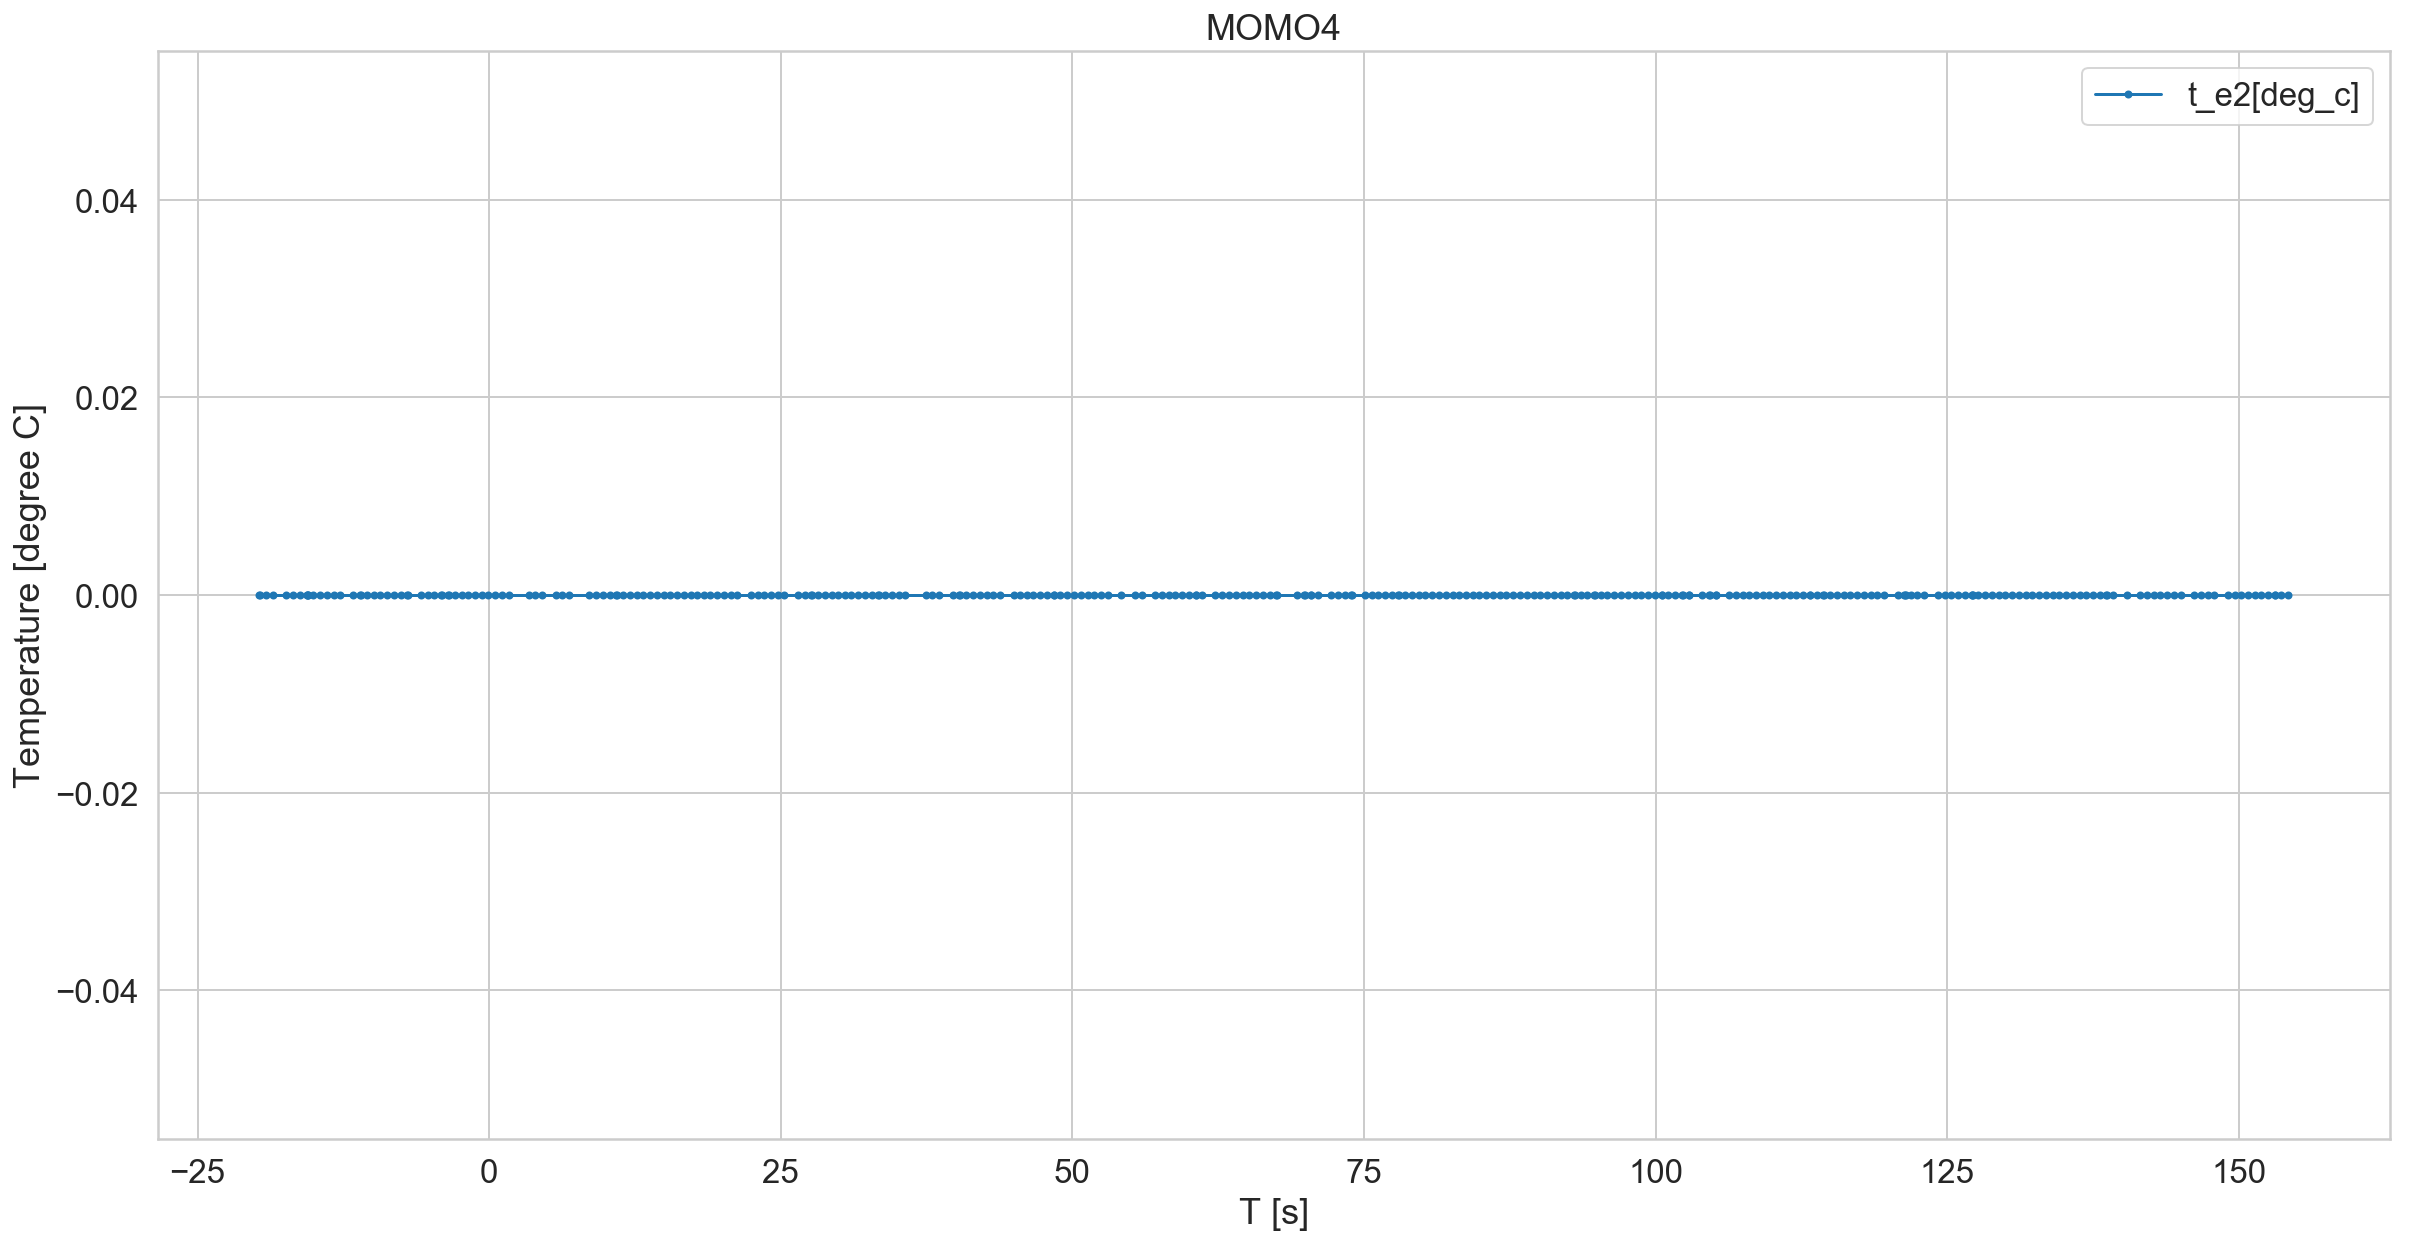

In [9]:
plot_csv(prefix, 'temperatures1')
plt.legend()
plt.ylabel('Temperature [degree C]')
plt.xlabel('T [s]')
plt.title(title)
plt.savefig(prefix + '_' + title + '_temperatures1.png', dpi=300)

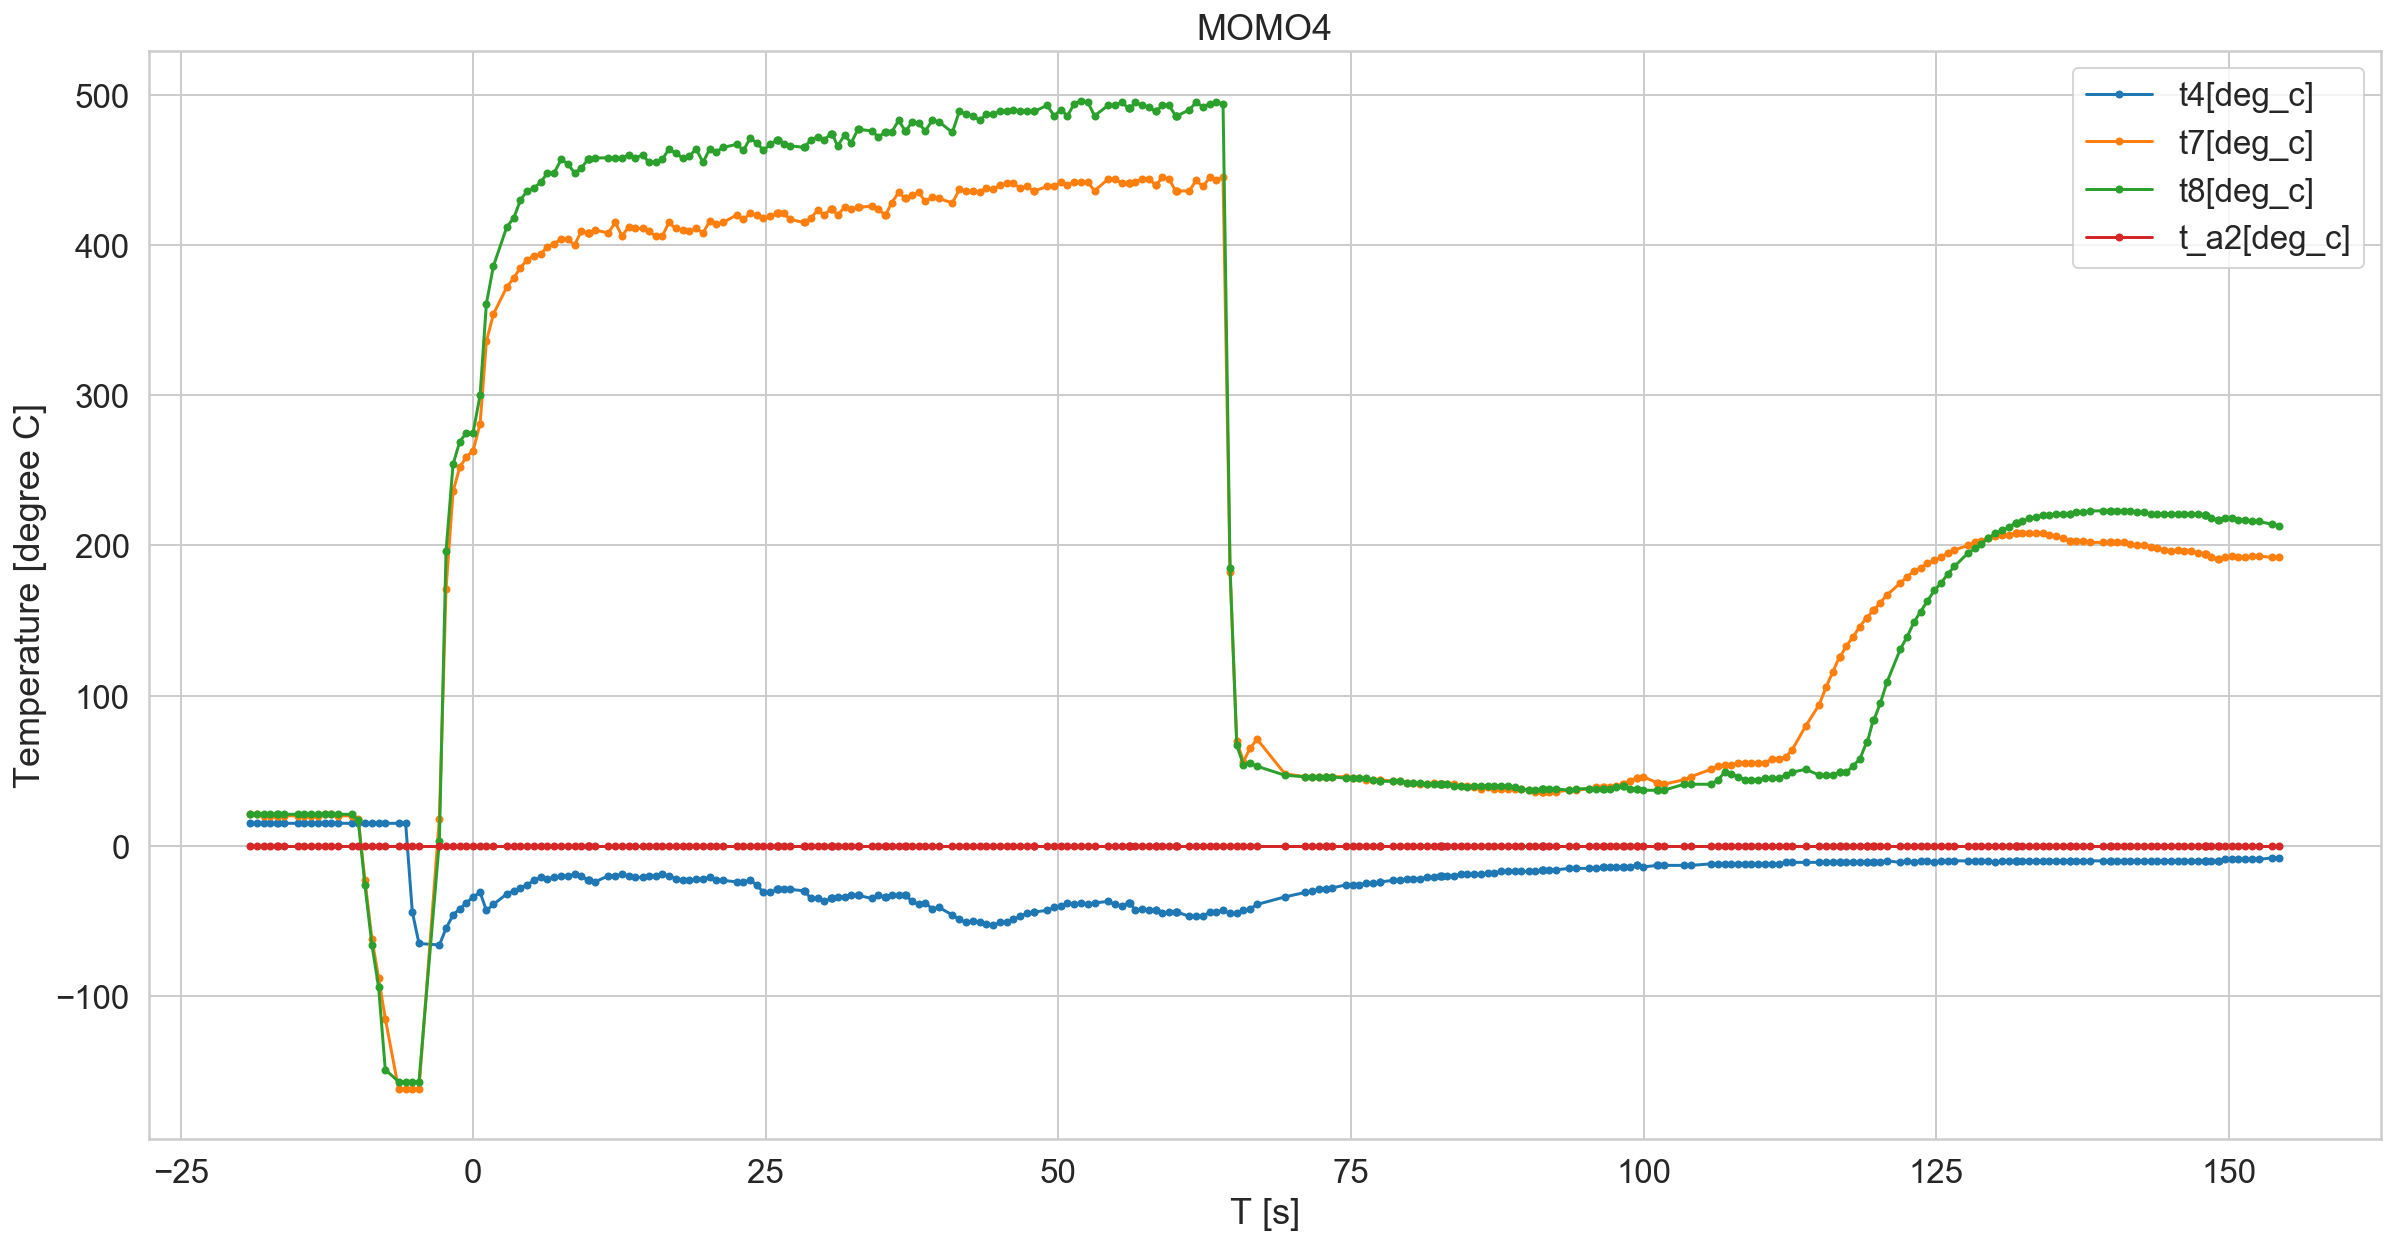

In [10]:
plot_csv('telem1', 'temperatures2')
plt.legend()
plt.ylabel('Temperature [degree C]')
plt.xlabel('T [s]')
plt.title(title)
plt.savefig(prefix + '_' + title + '_temperatures1.png', dpi=300)

### Pressures

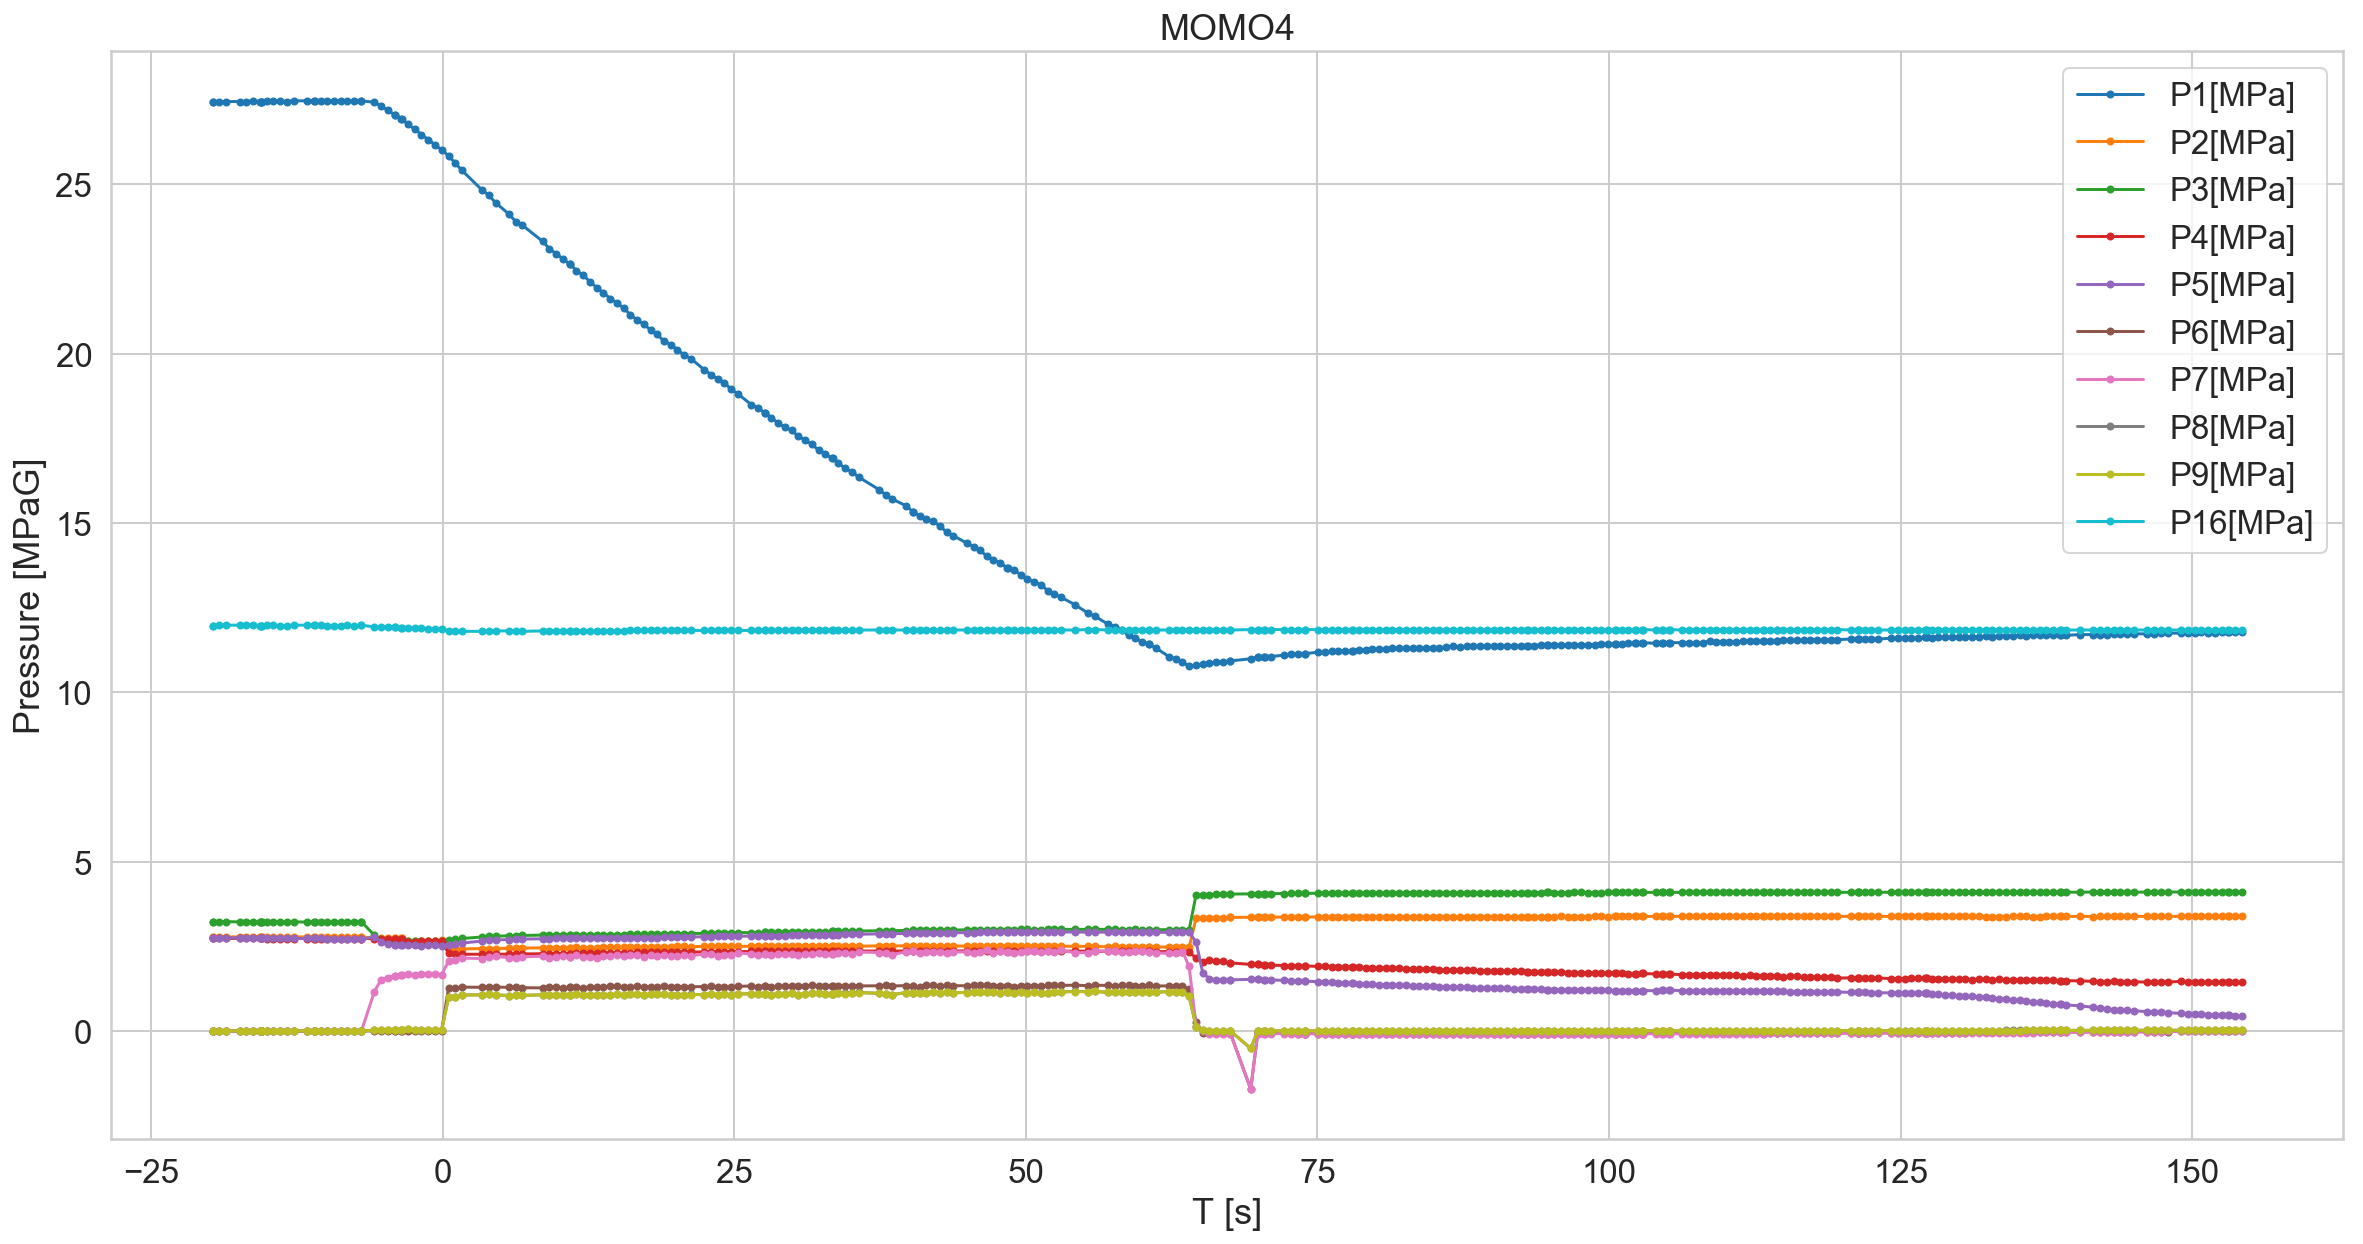

In [12]:
plot_csv(prefix, 'pressure_gauges1')
plt.legend()
plt.ylabel('Pressure [MPaG]')
plt.xlabel('T [s]')
plt.title(title)
plt.savefig(prefix + '_' + title + '_pressure_gauges1.png', dpi=300)

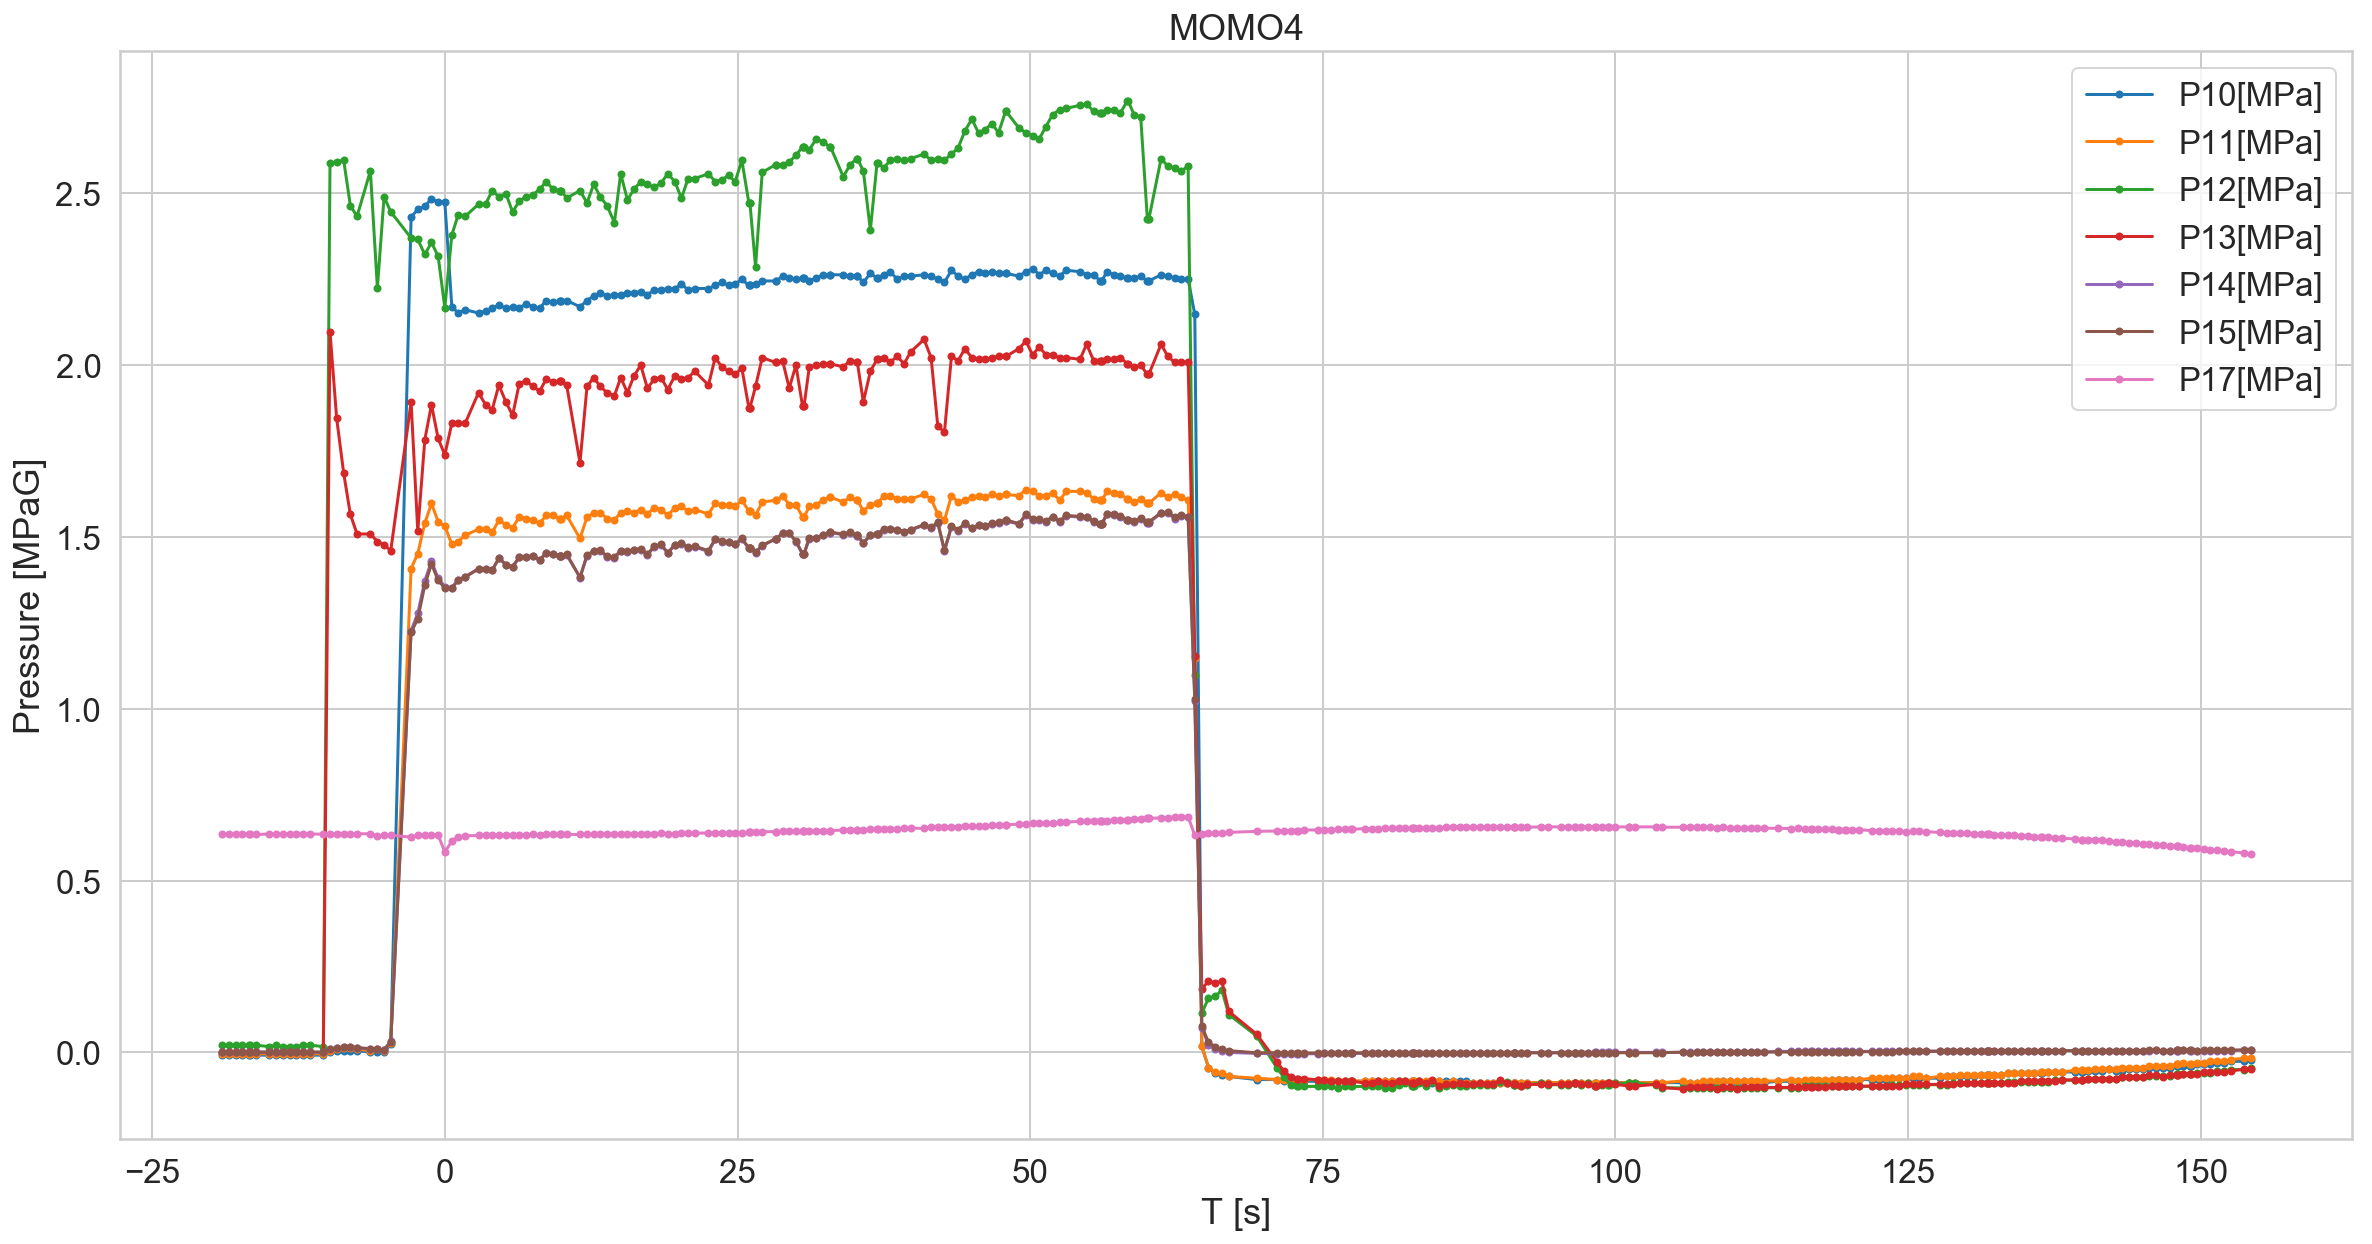

In [13]:
plot_csv(prefix, 'pressure_gauges2')
plt.legend()
plt.ylabel('Pressure [MPaG]')
plt.xlabel('T [s]')
plt.title(title)
plt.savefig(prefix + '_' + title + '_pressure_gauges2.png', dpi=300)

### Gyroscope

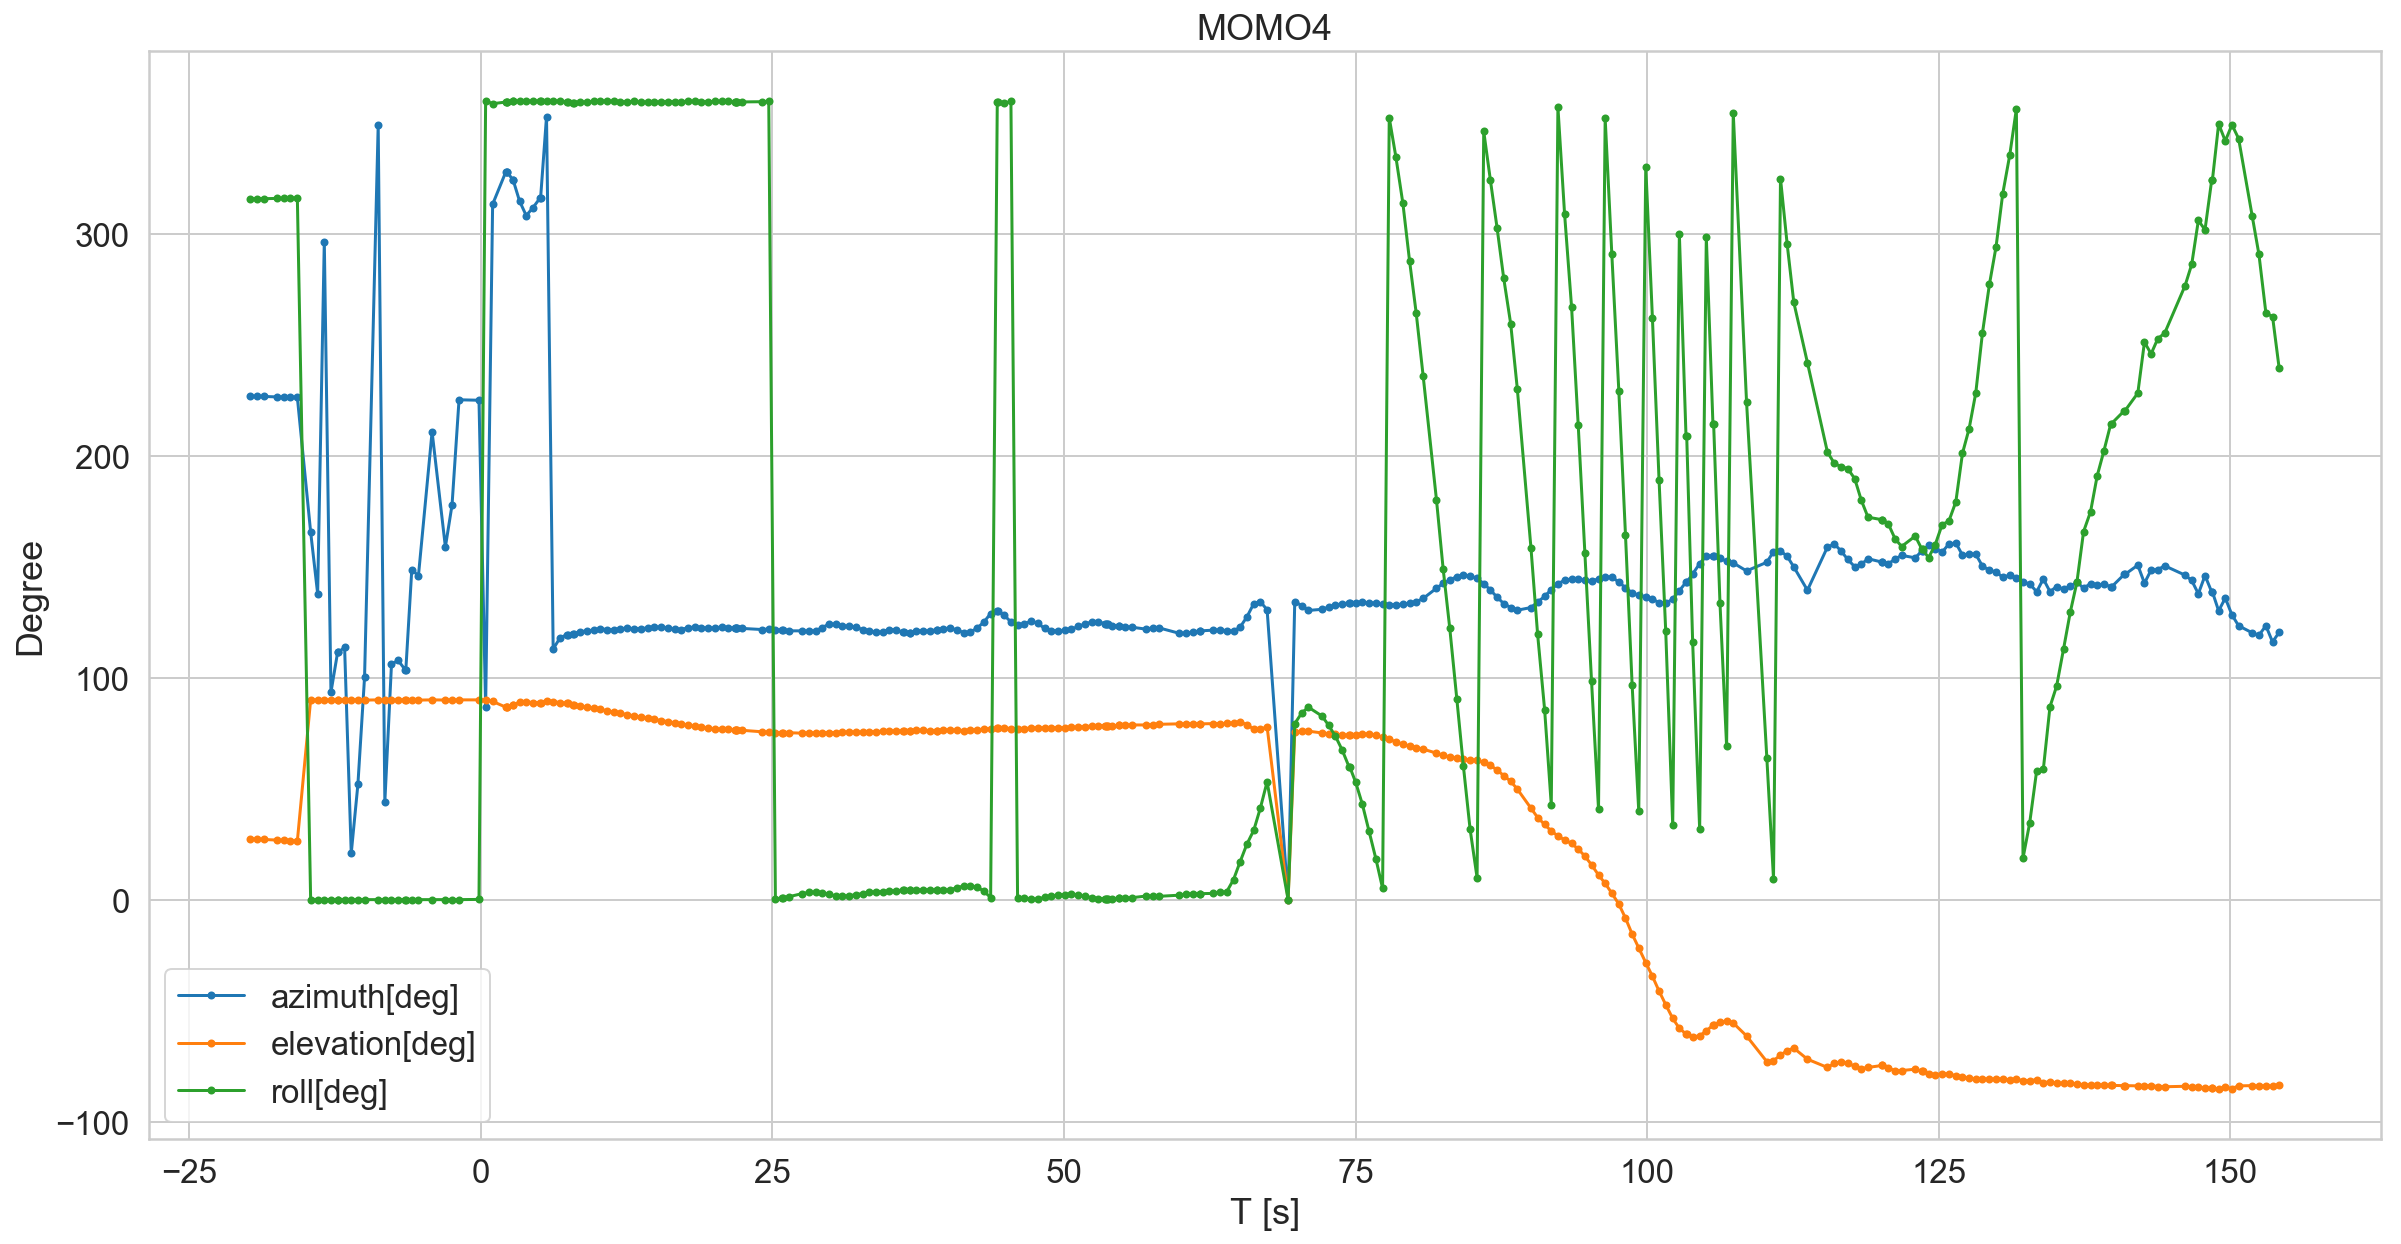

In [14]:
plot_csv(prefix, 'attitude')
plt.legend()
plt.ylabel('Degree')
plt.xlabel('T [s]')
#plt.xlim(60, 0)
plt.title(title)
plt.savefig(prefix + '_' + title + '_attitude.png', dpi=300)

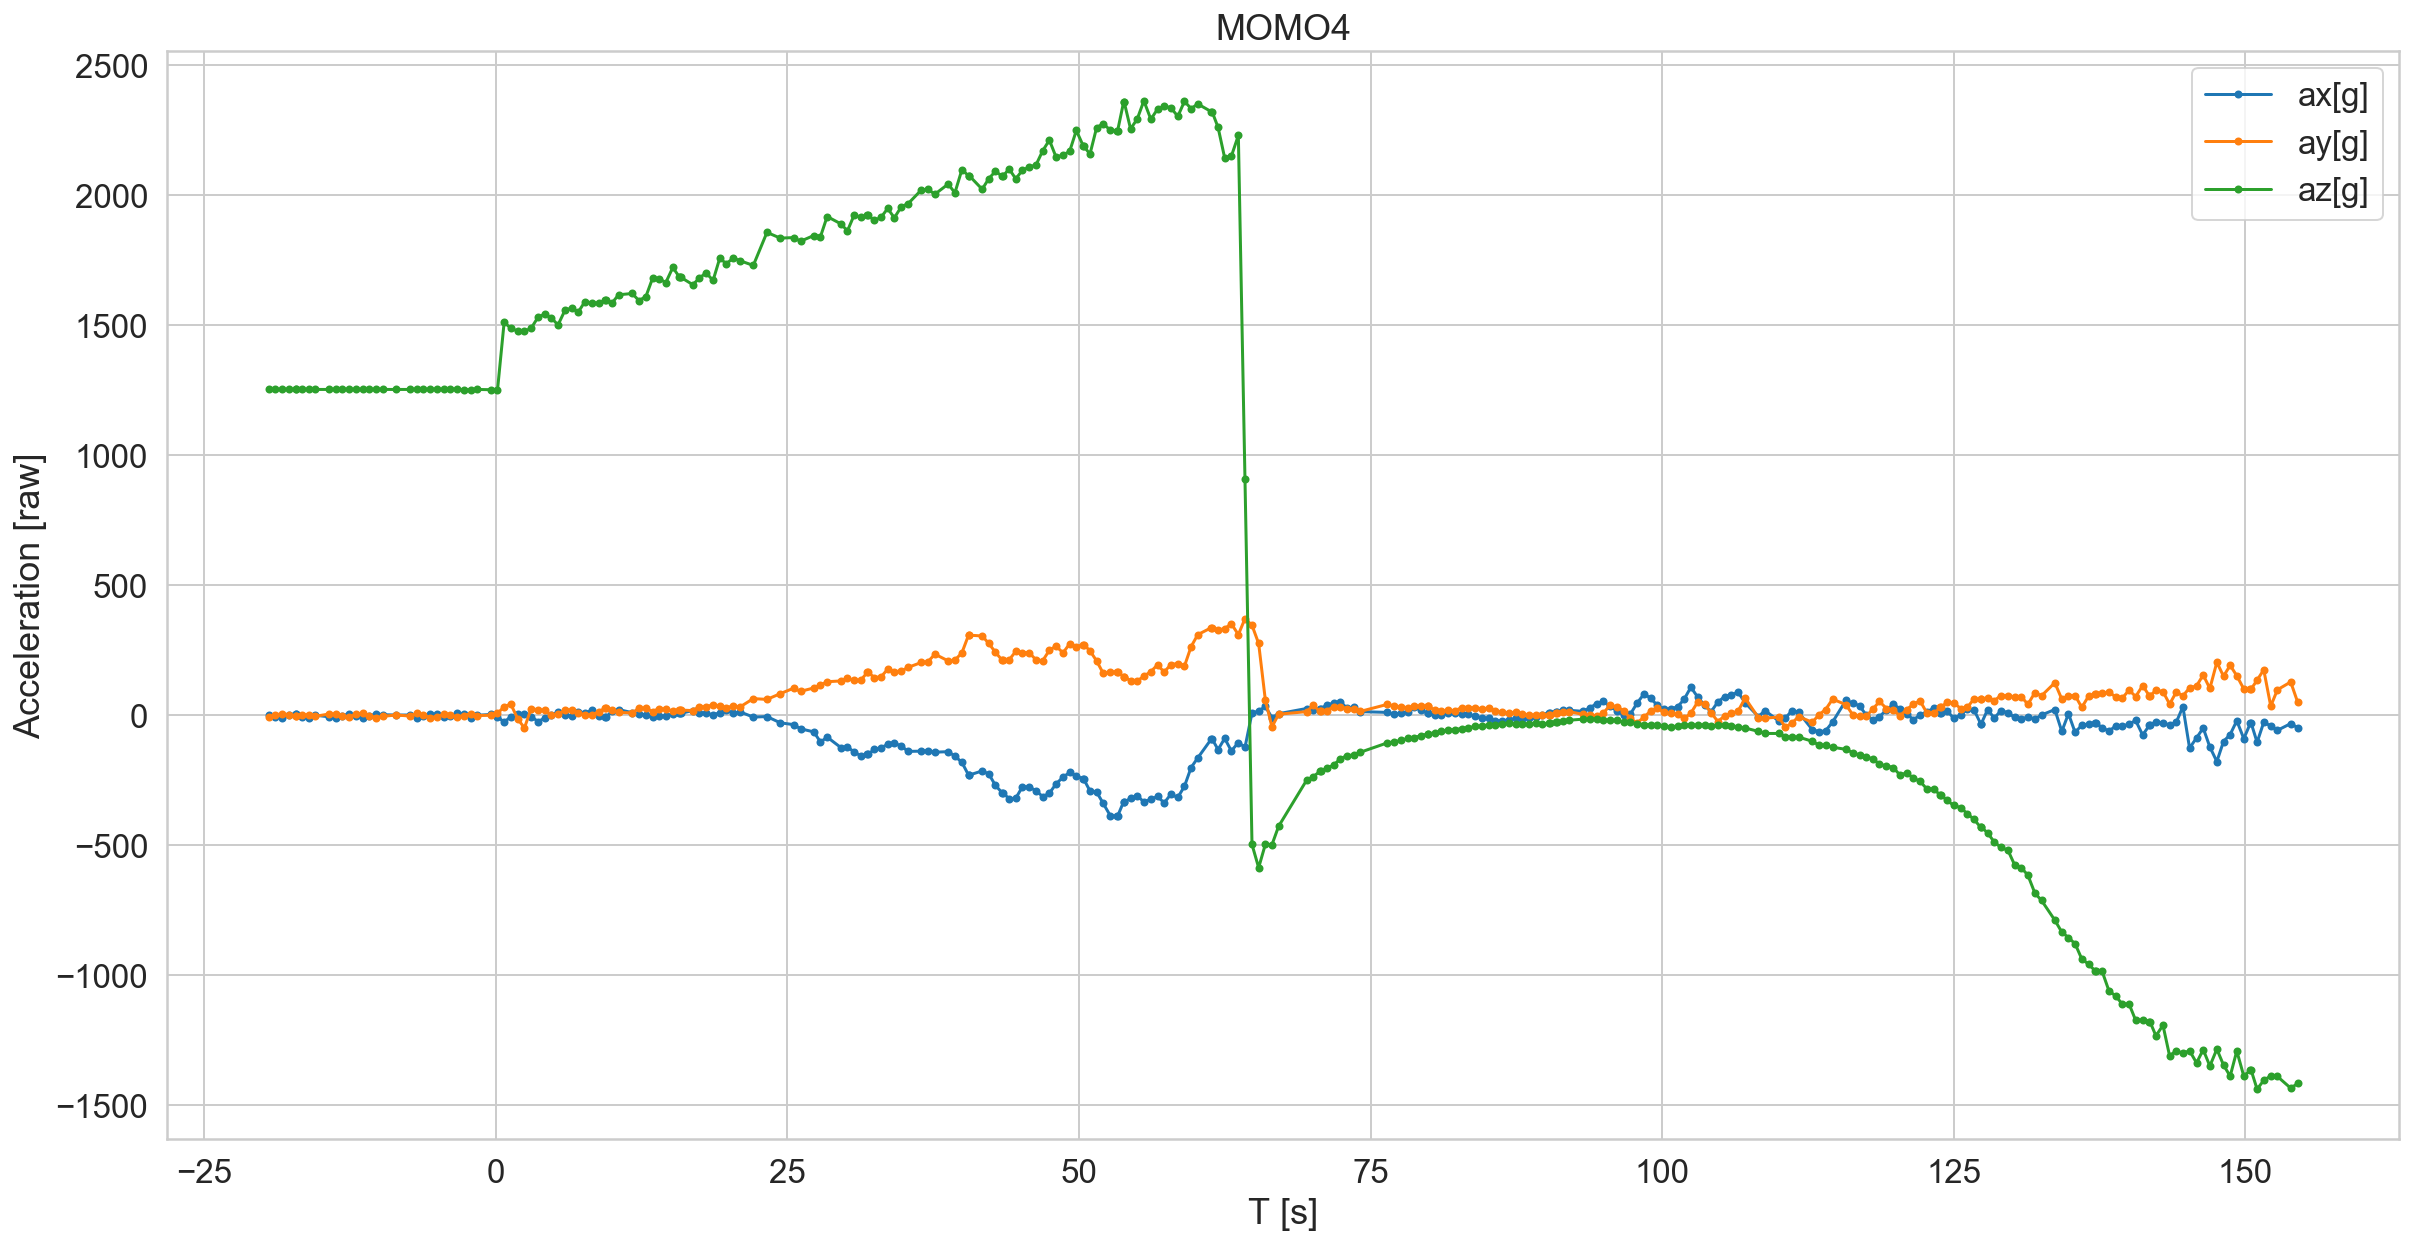

In [15]:
plot_csv(prefix, 'sensors', ['ax[g]','ay[g]','az[g]'])
plt.legend()
plt.ylabel('Acceleration [raw]')
plt.xlabel('T [s]')
plt.title(title)
plt.savefig(prefix + '_' + title + '_acceleration.png', dpi=300)

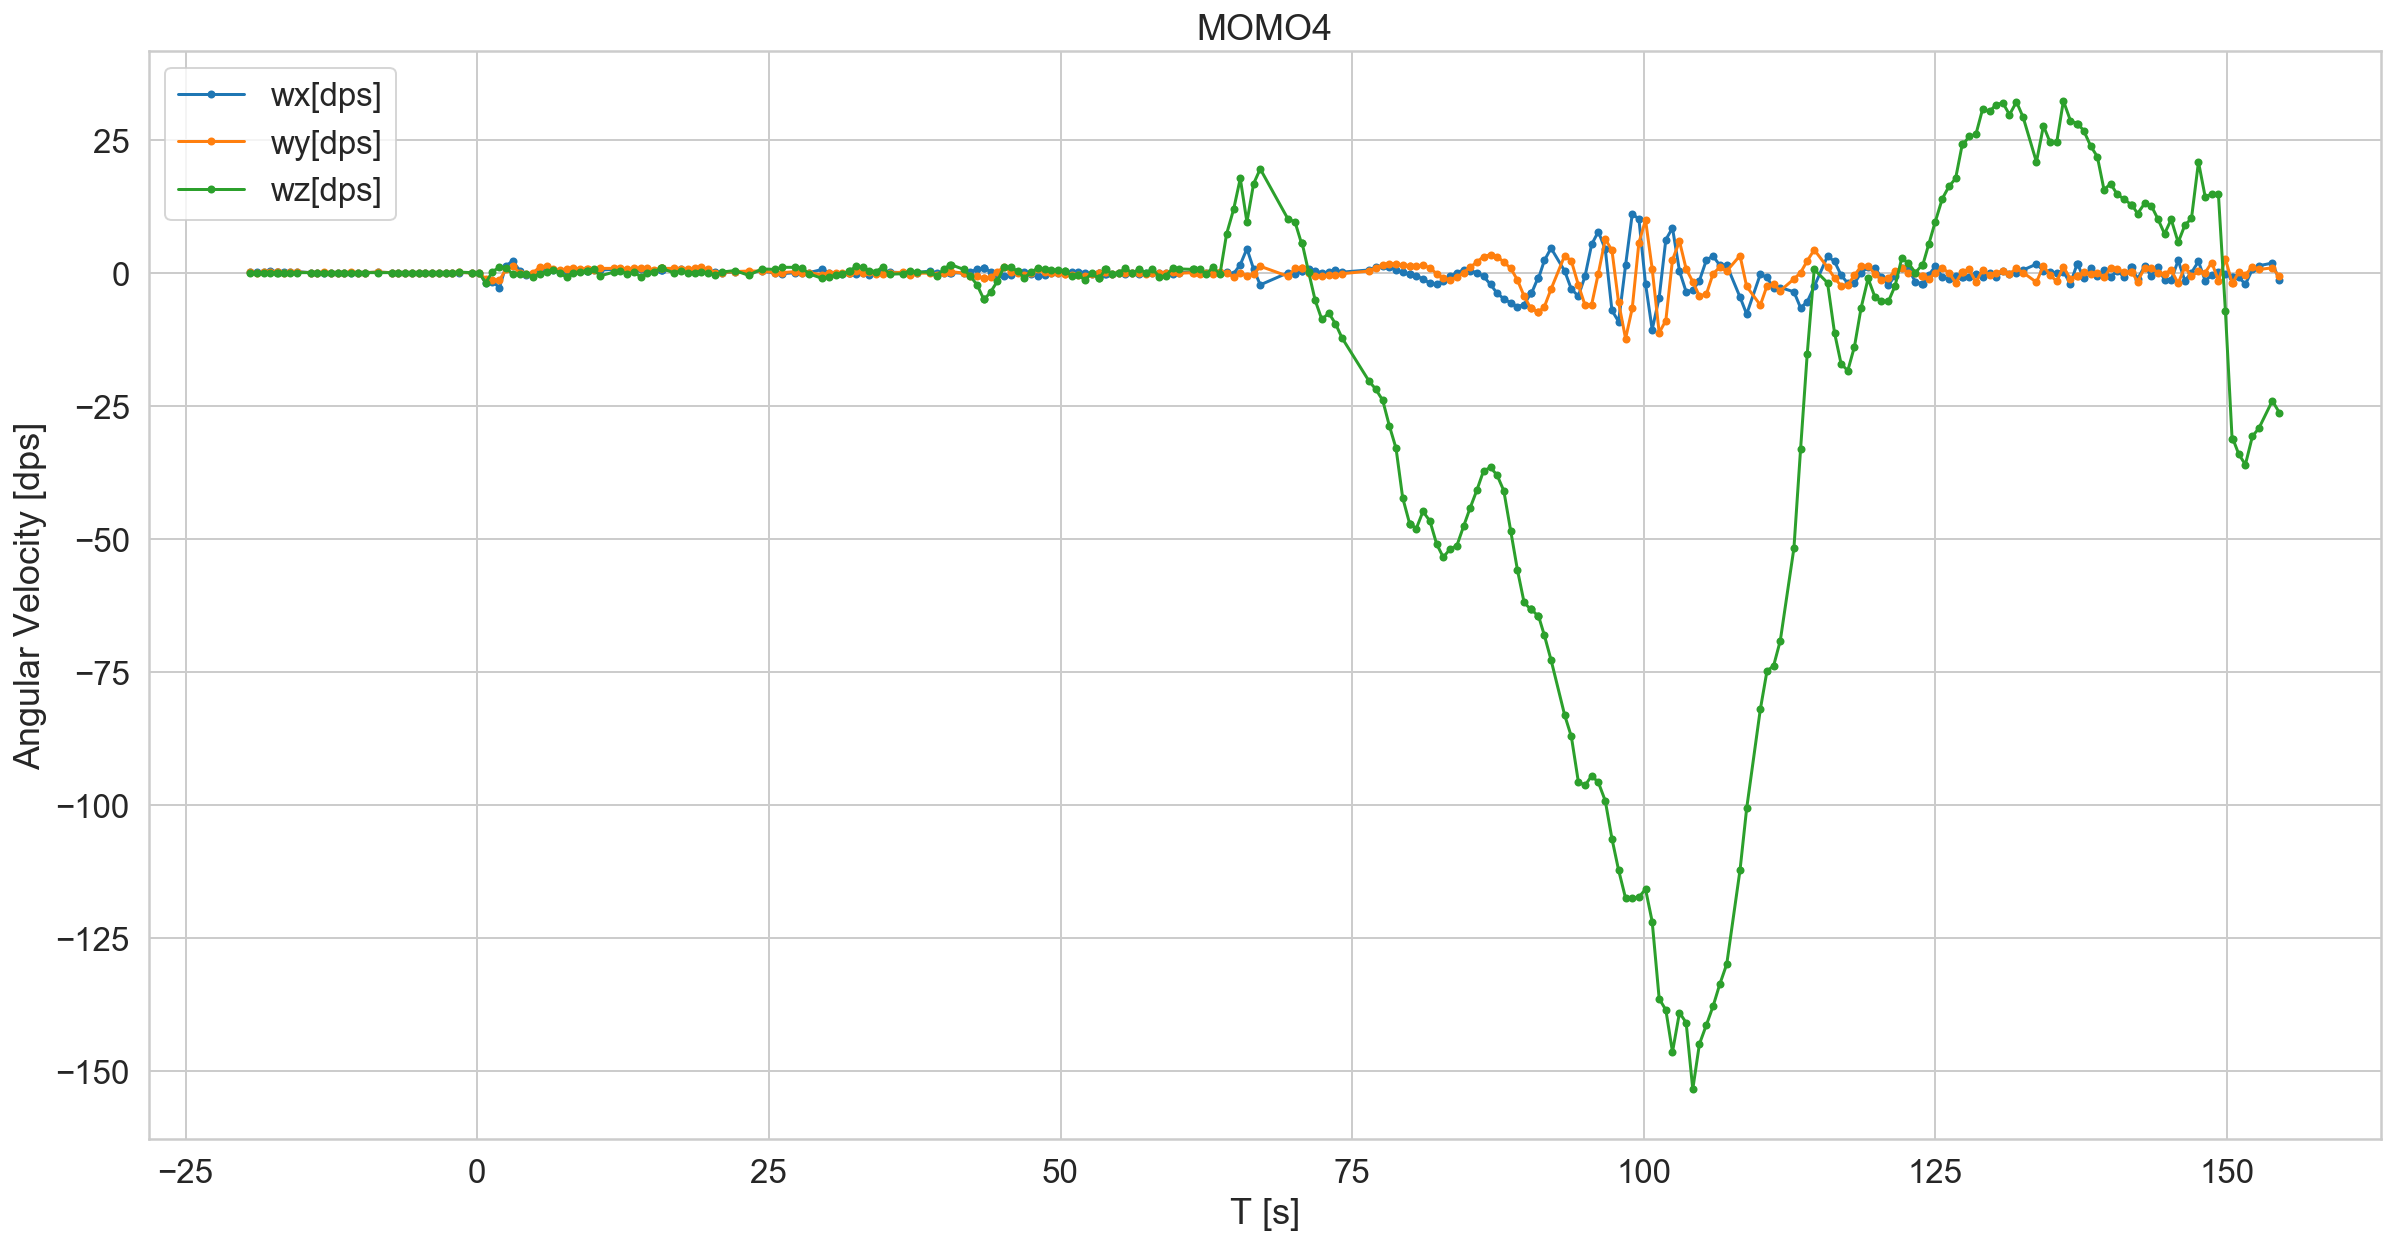

In [16]:
plot_csv(prefix, 'sensors', ['wx[dps]','wy[dps]','wz[dps]'])
plt.legend()
plt.ylabel('Angular Velocity [dps]')
plt.xlabel('T [s]')
plt.title(title)
plt.savefig(prefix + '_' + title + '_angular_velo.png', dpi=300)

### GGG Servo

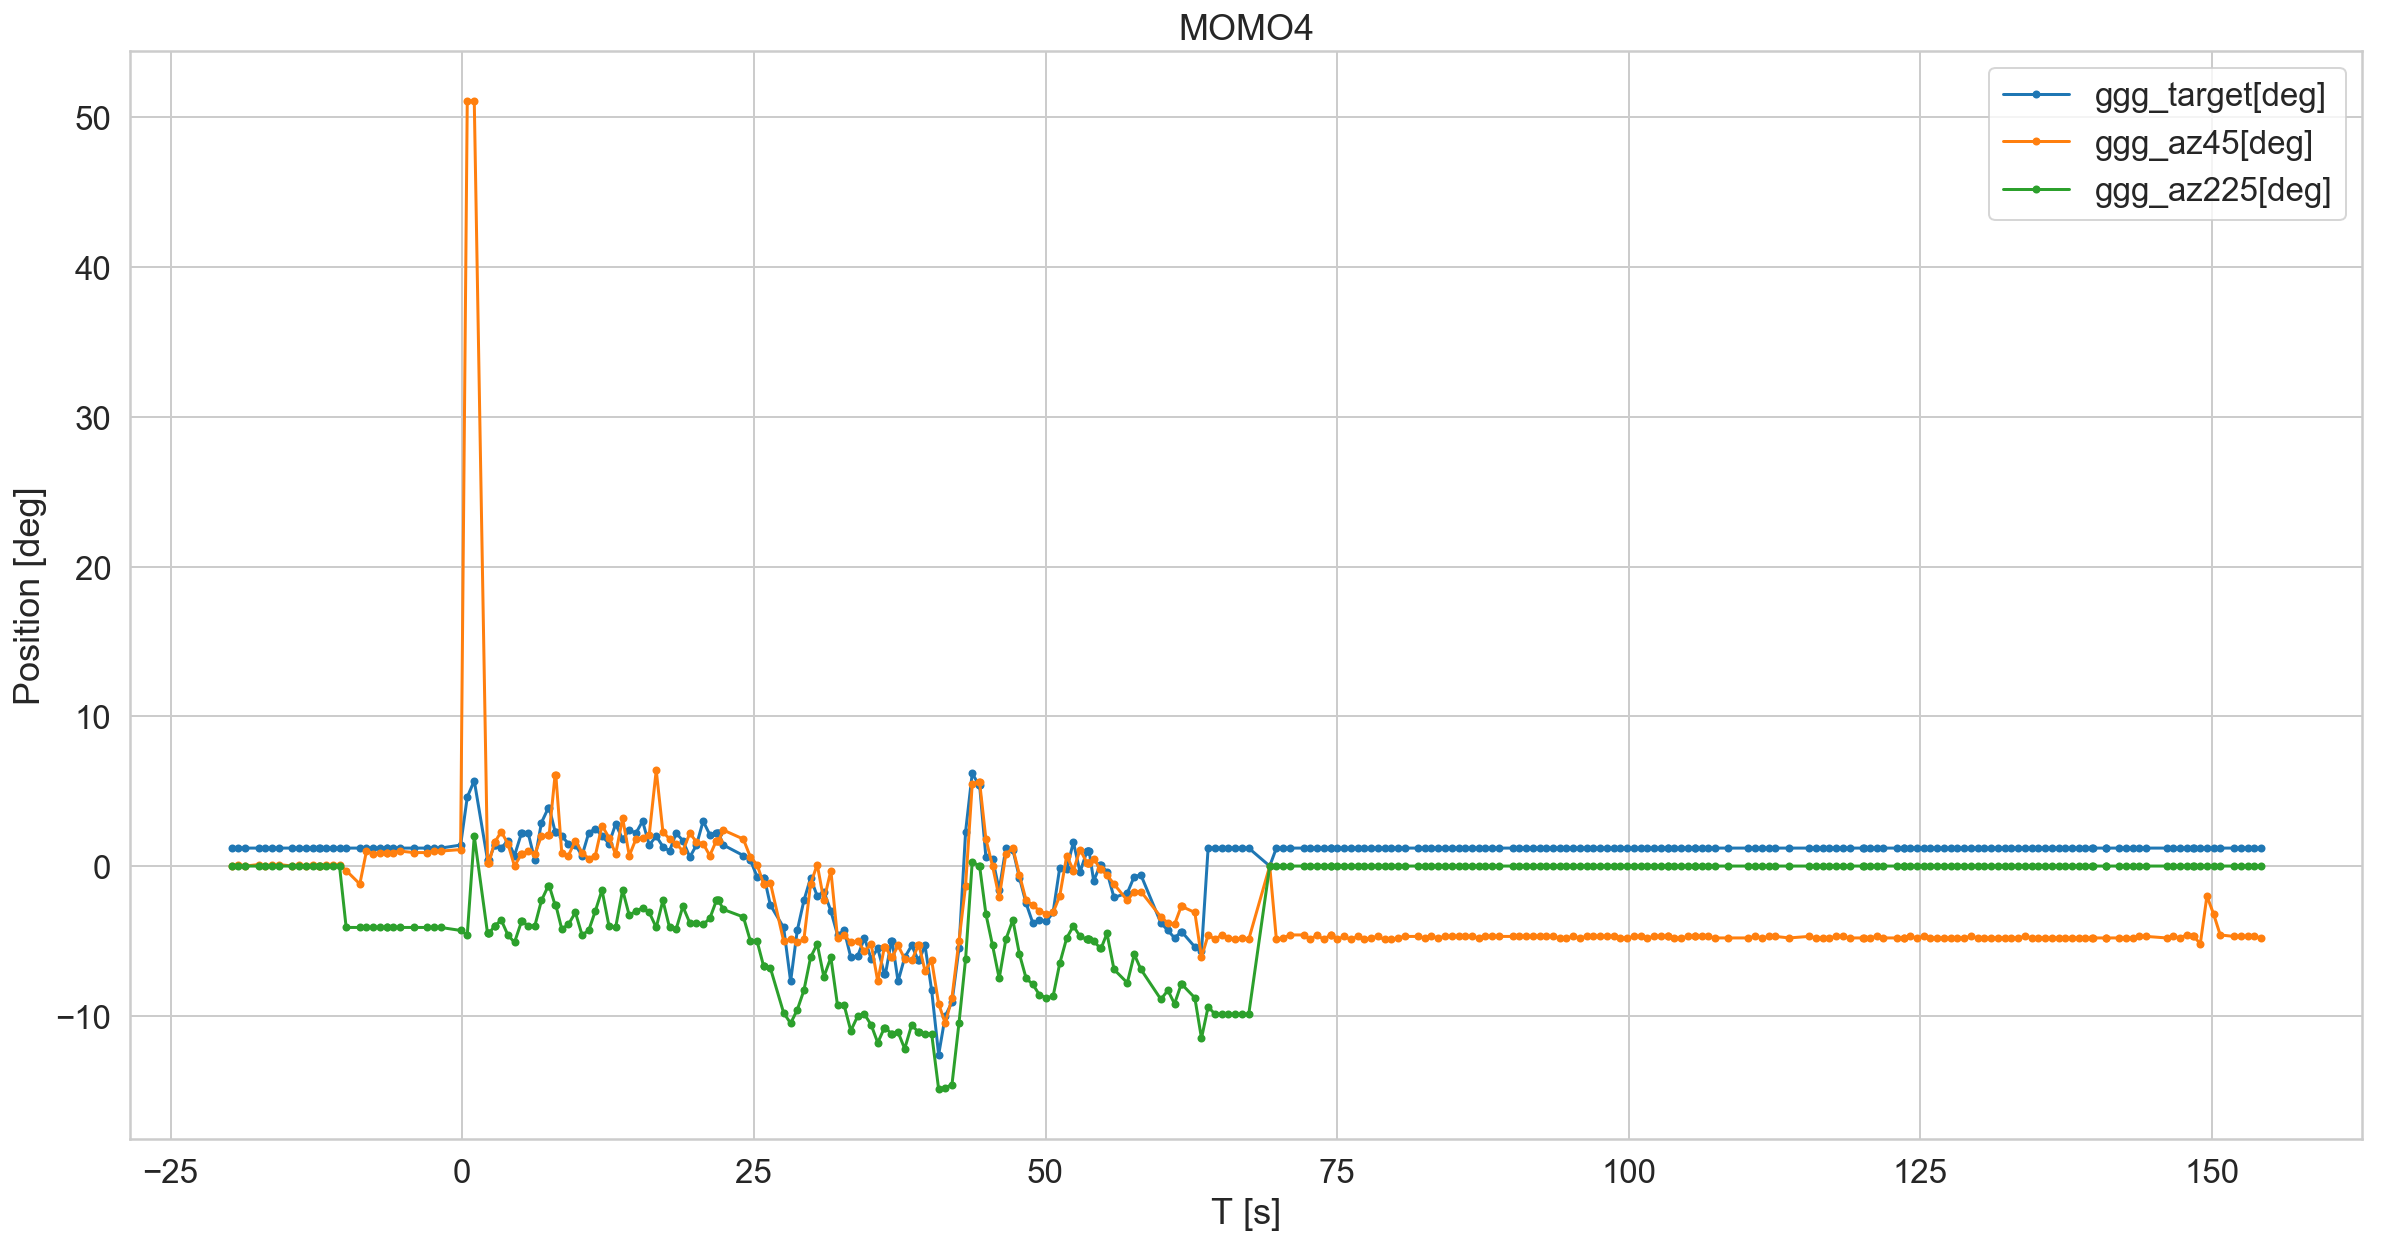

In [17]:
plot_csv(prefix, 'ggg')
plt.legend()
plt.ylabel('Position [deg]')
plt.xlabel('T [s]')
plt.title(title)
plt.savefig(prefix + '_' + title + '_ggg_servo.png', dpi=300)

### GImbal

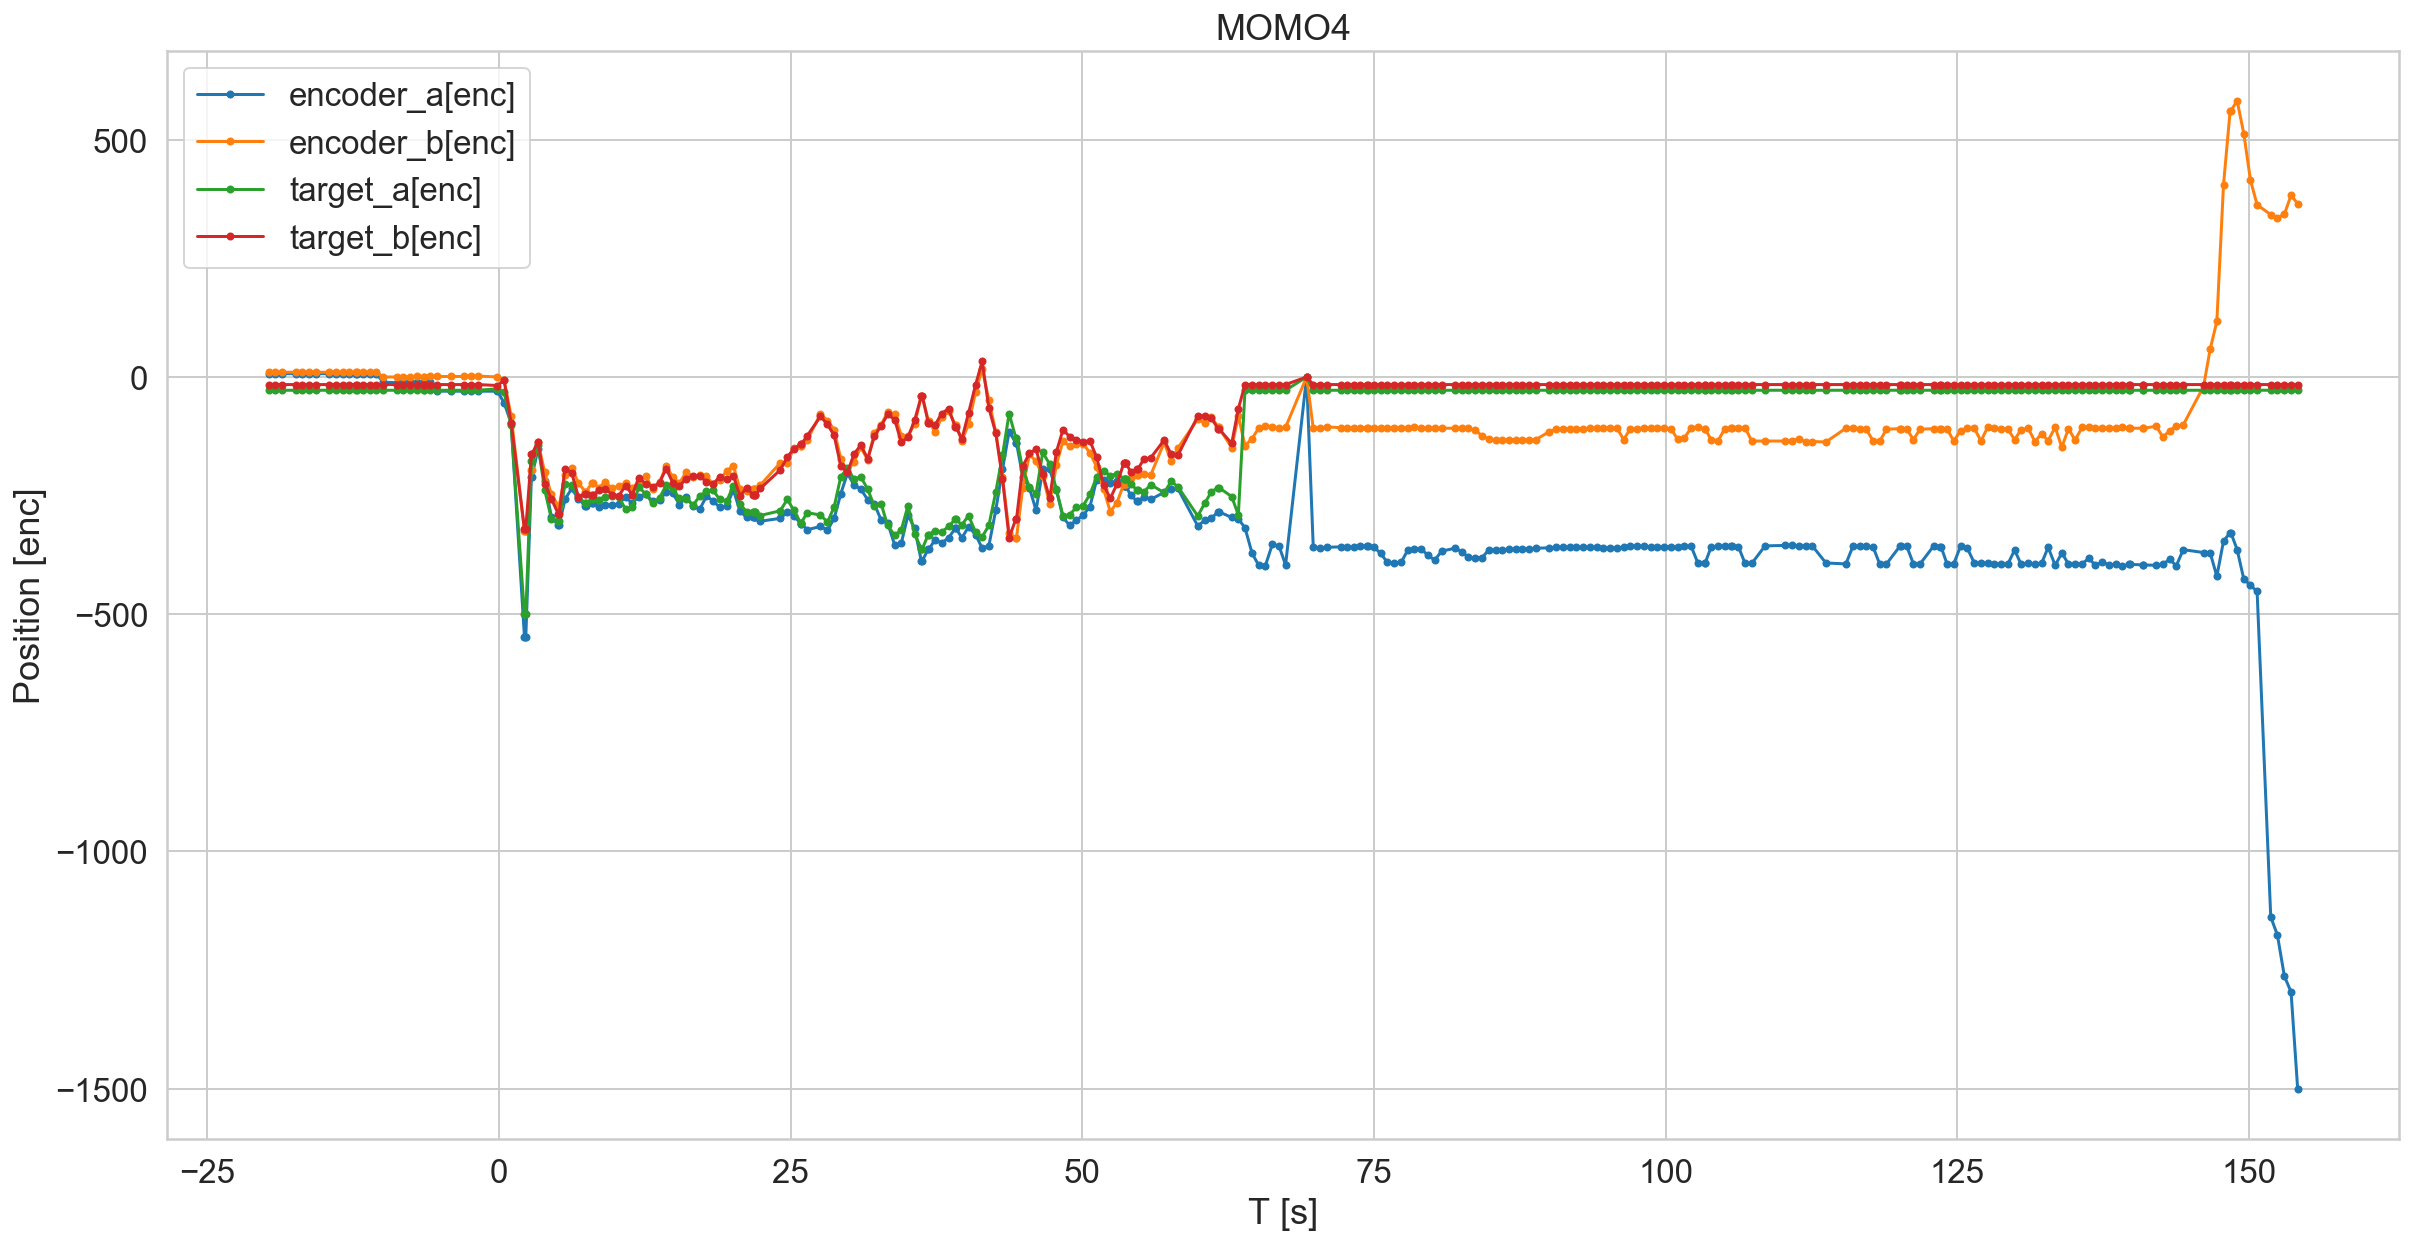

In [18]:
plot_csv(prefix, 'gimbal')
plt.legend()
plt.ylabel('Position [enc]')
plt.xlabel('T [s]')
plt.title(title)
plt.savefig(prefix + '_' + title + '_gimbaL.png', dpi=300)

### Barometer

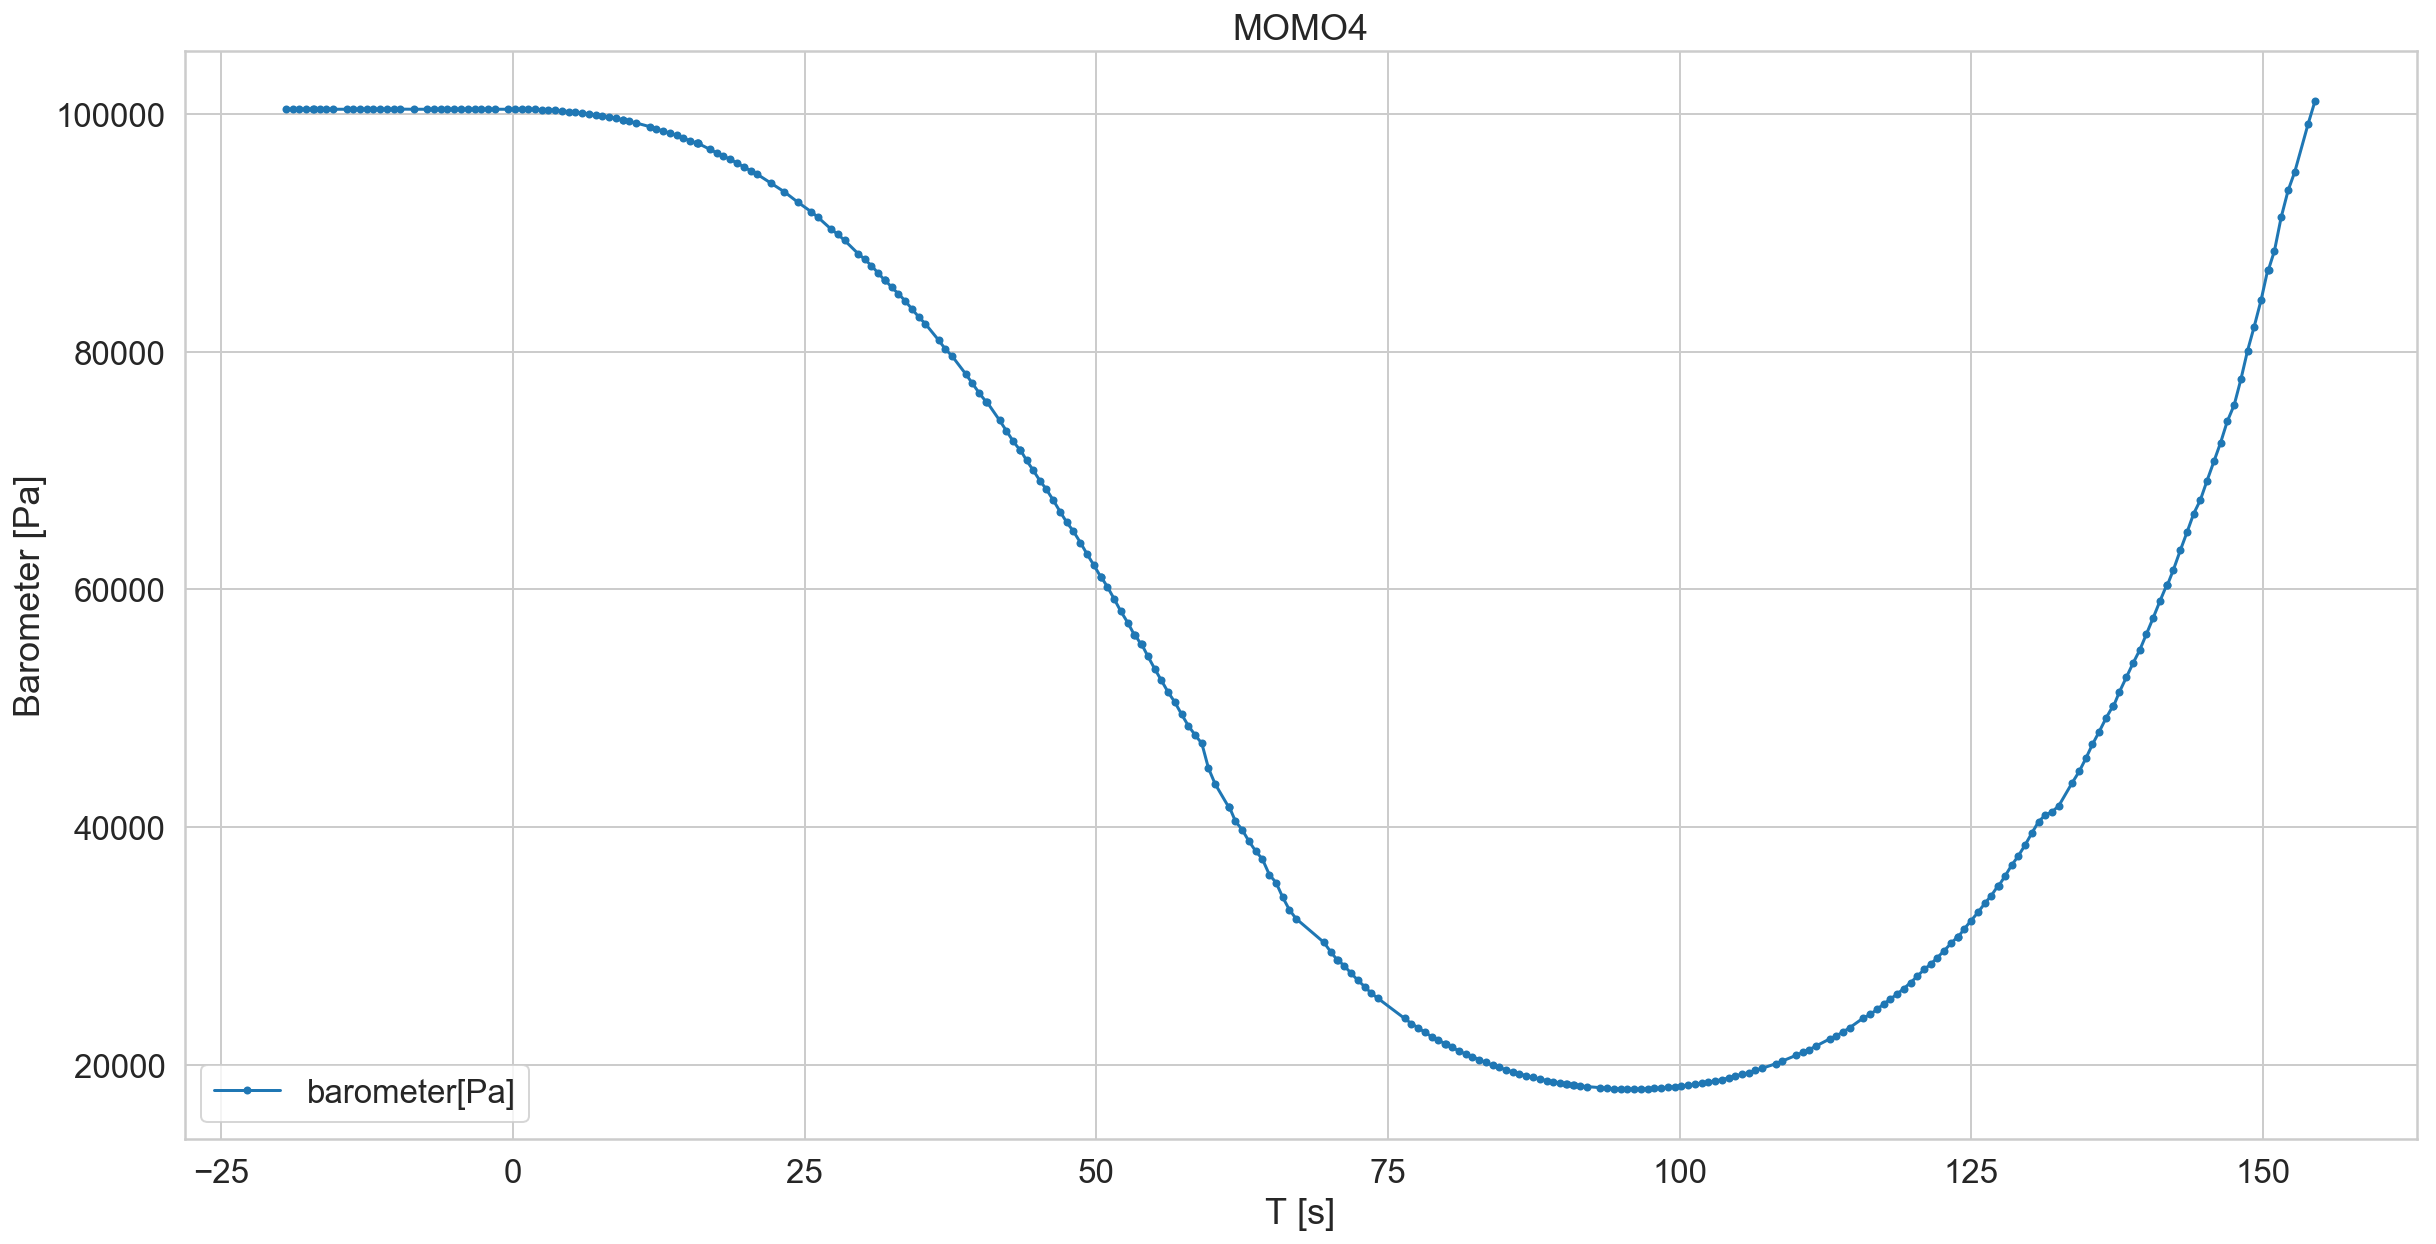

In [19]:
plot_csv(prefix, 'sensors', ['barometer[Pa]'])
plt.legend()
plt.ylabel('Barometer [Pa]')
plt.xlabel('T [s]')
plt.title(title)
plt.savefig(prefix + '_' + title + '_barometer.png', dpi=300)

In [20]:
def plot_barometer_altitude(prefix, suffix):
    df = read_csv(prefix, suffix)
    barometer = df['barometer[Pa]']
    h = 44330.0*(1.0-np.power((barometer/barometer[0]),(1.0/5.255)))
    plt.plot(df['T[s]'], h, label=None)

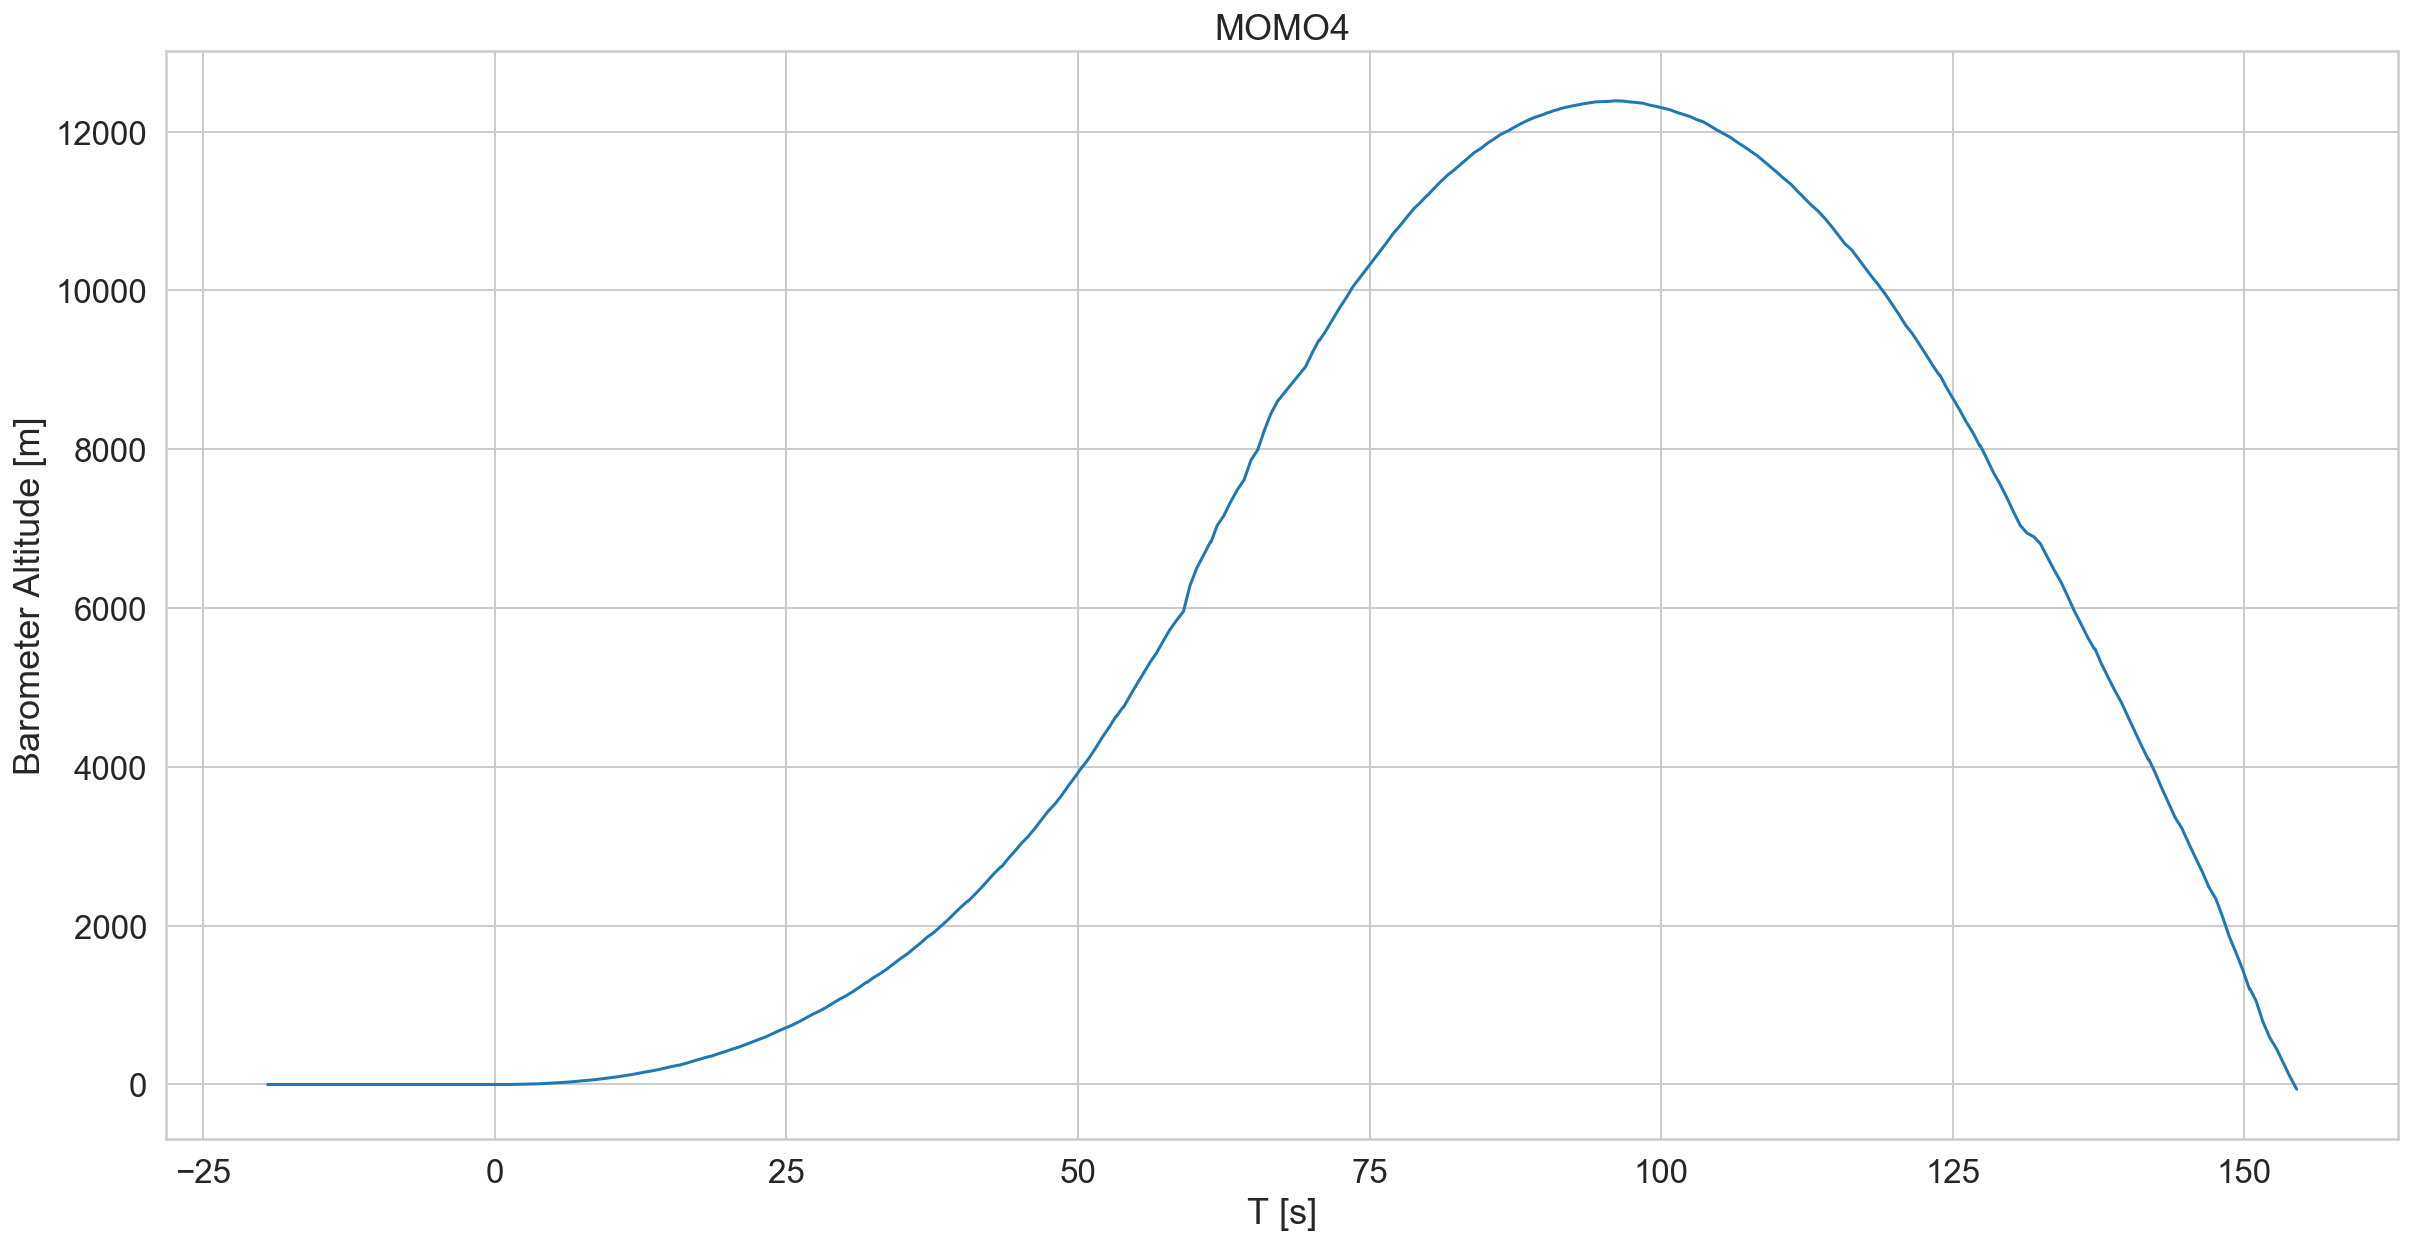

In [21]:
plot_barometer_altitude(prefix, 'sensors')
#plt.legend()
plt.ylabel('Barometer Altitude [m]')
plt.xlabel('T [s]')
plt.title(title)
plt.savefig(title + '_barometer_altitude.png', dpi=300)

### RF

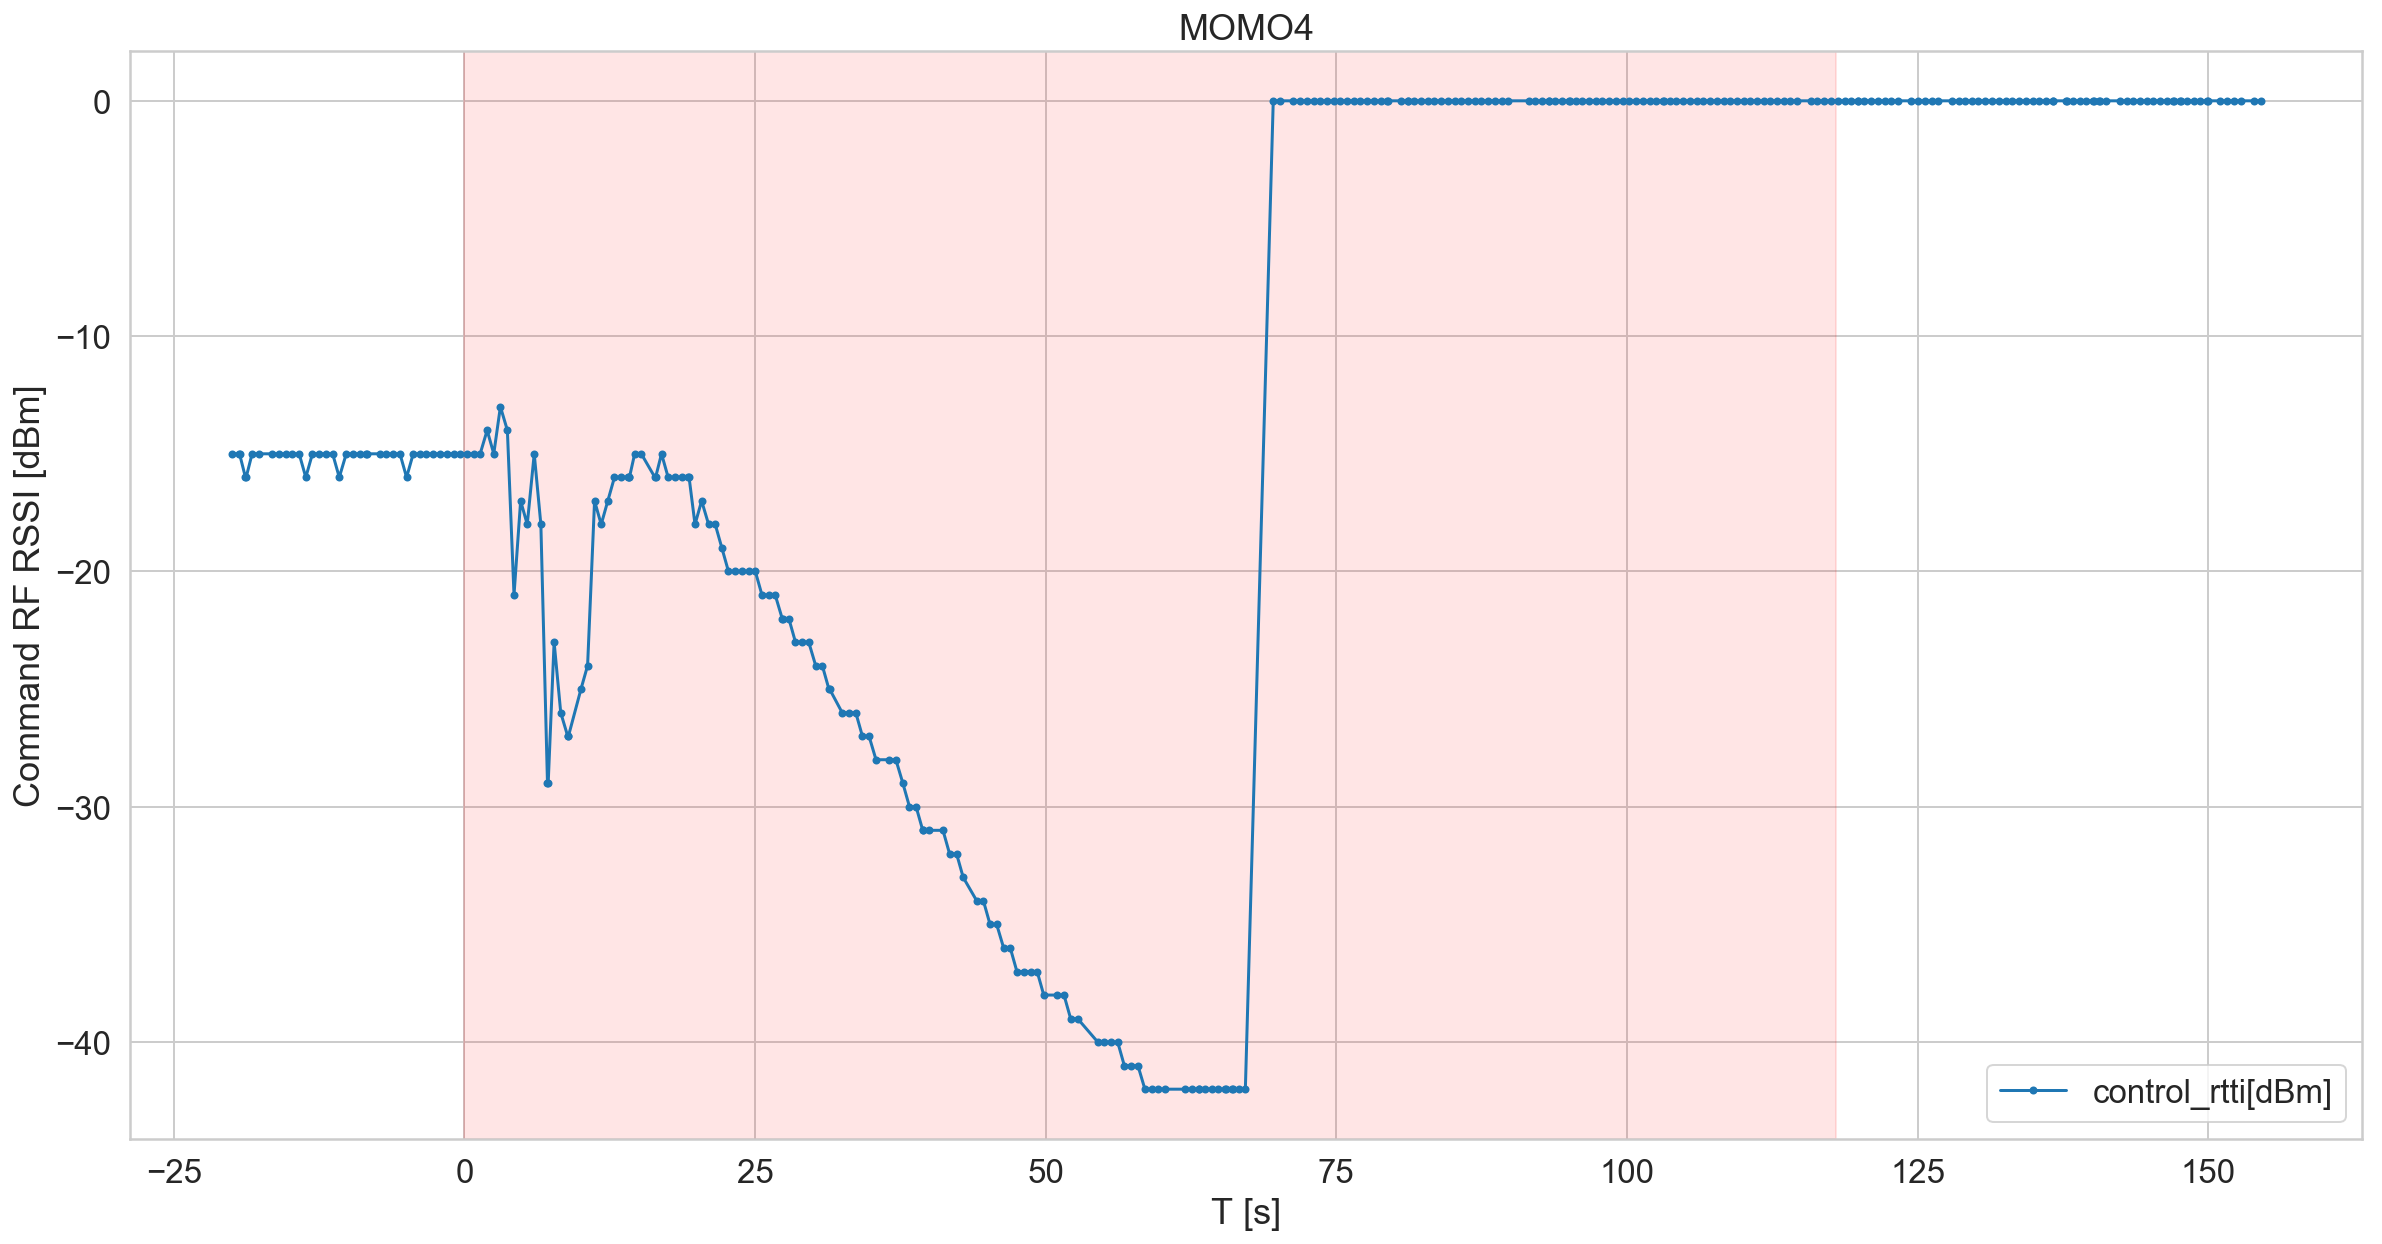

In [22]:
plot_csv(prefix, 'command_rf_and_voltages', ['control_rtti[dBm]'])
plt.legend()
plt.ylabel('Command RF RSSI [dBm]')
plt.xlabel('T [s]')
plt.title(title)
plt.axvspan(0,118,color='red',alpha=0.1)
plt.savefig(prefix + '_' + title + '_command_rf_rssi.png', dpi=300)

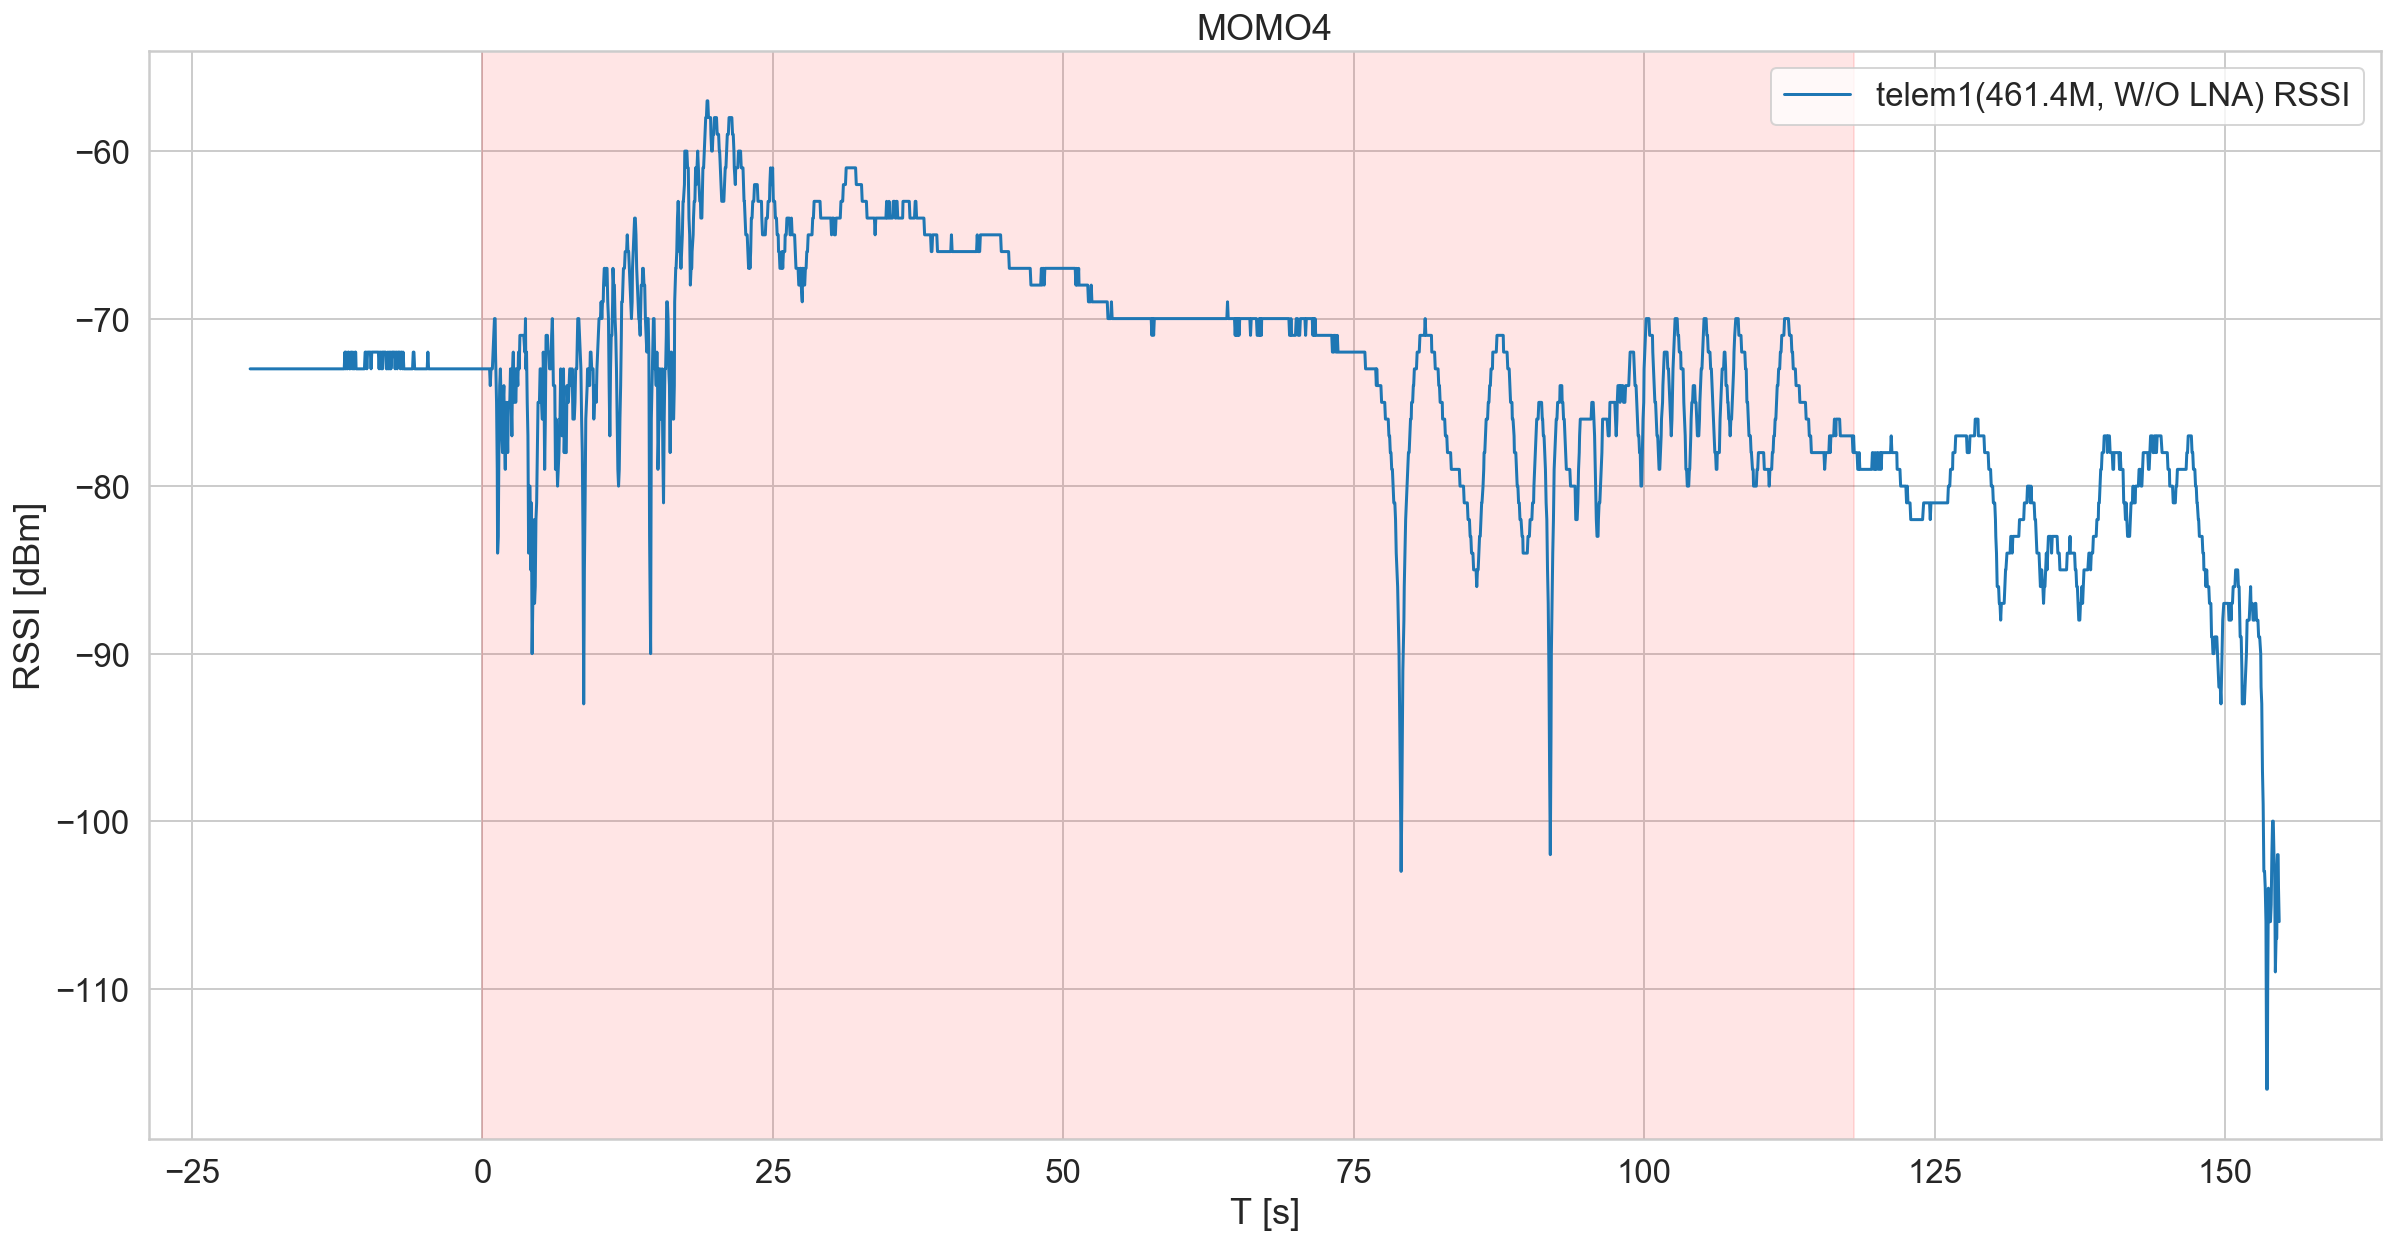

In [23]:
df = read_csv('telem1', 'receiver_rssi')
plt.plot(df.iloc[:,0], df.iloc[:,1], label='telem1(461.4M, W/O LNA) RSSI')
#df = read_csv('telem2', 'receiver_rssi')
#plt.plot(df.iloc[:,0], df.iloc[:,1], label='telem2(461.3M, W LNA) RSSI')
#df = read_csv('telem3', 'receiver_rssi')
#plt.plot(df.iloc[:,0], df.iloc[:,1], label='telem3(461.4M, W LNA) RSSI')
plt.legend()
plt.axvspan(0,118,color='red',alpha=0.1)
plt.ylabel('RSSI [dBm]')
plt.xlabel('T [s]')
plt.title(title)
plt.savefig(prefix + '_' + title + '_telemetry_rf_rssi.png', dpi=300)

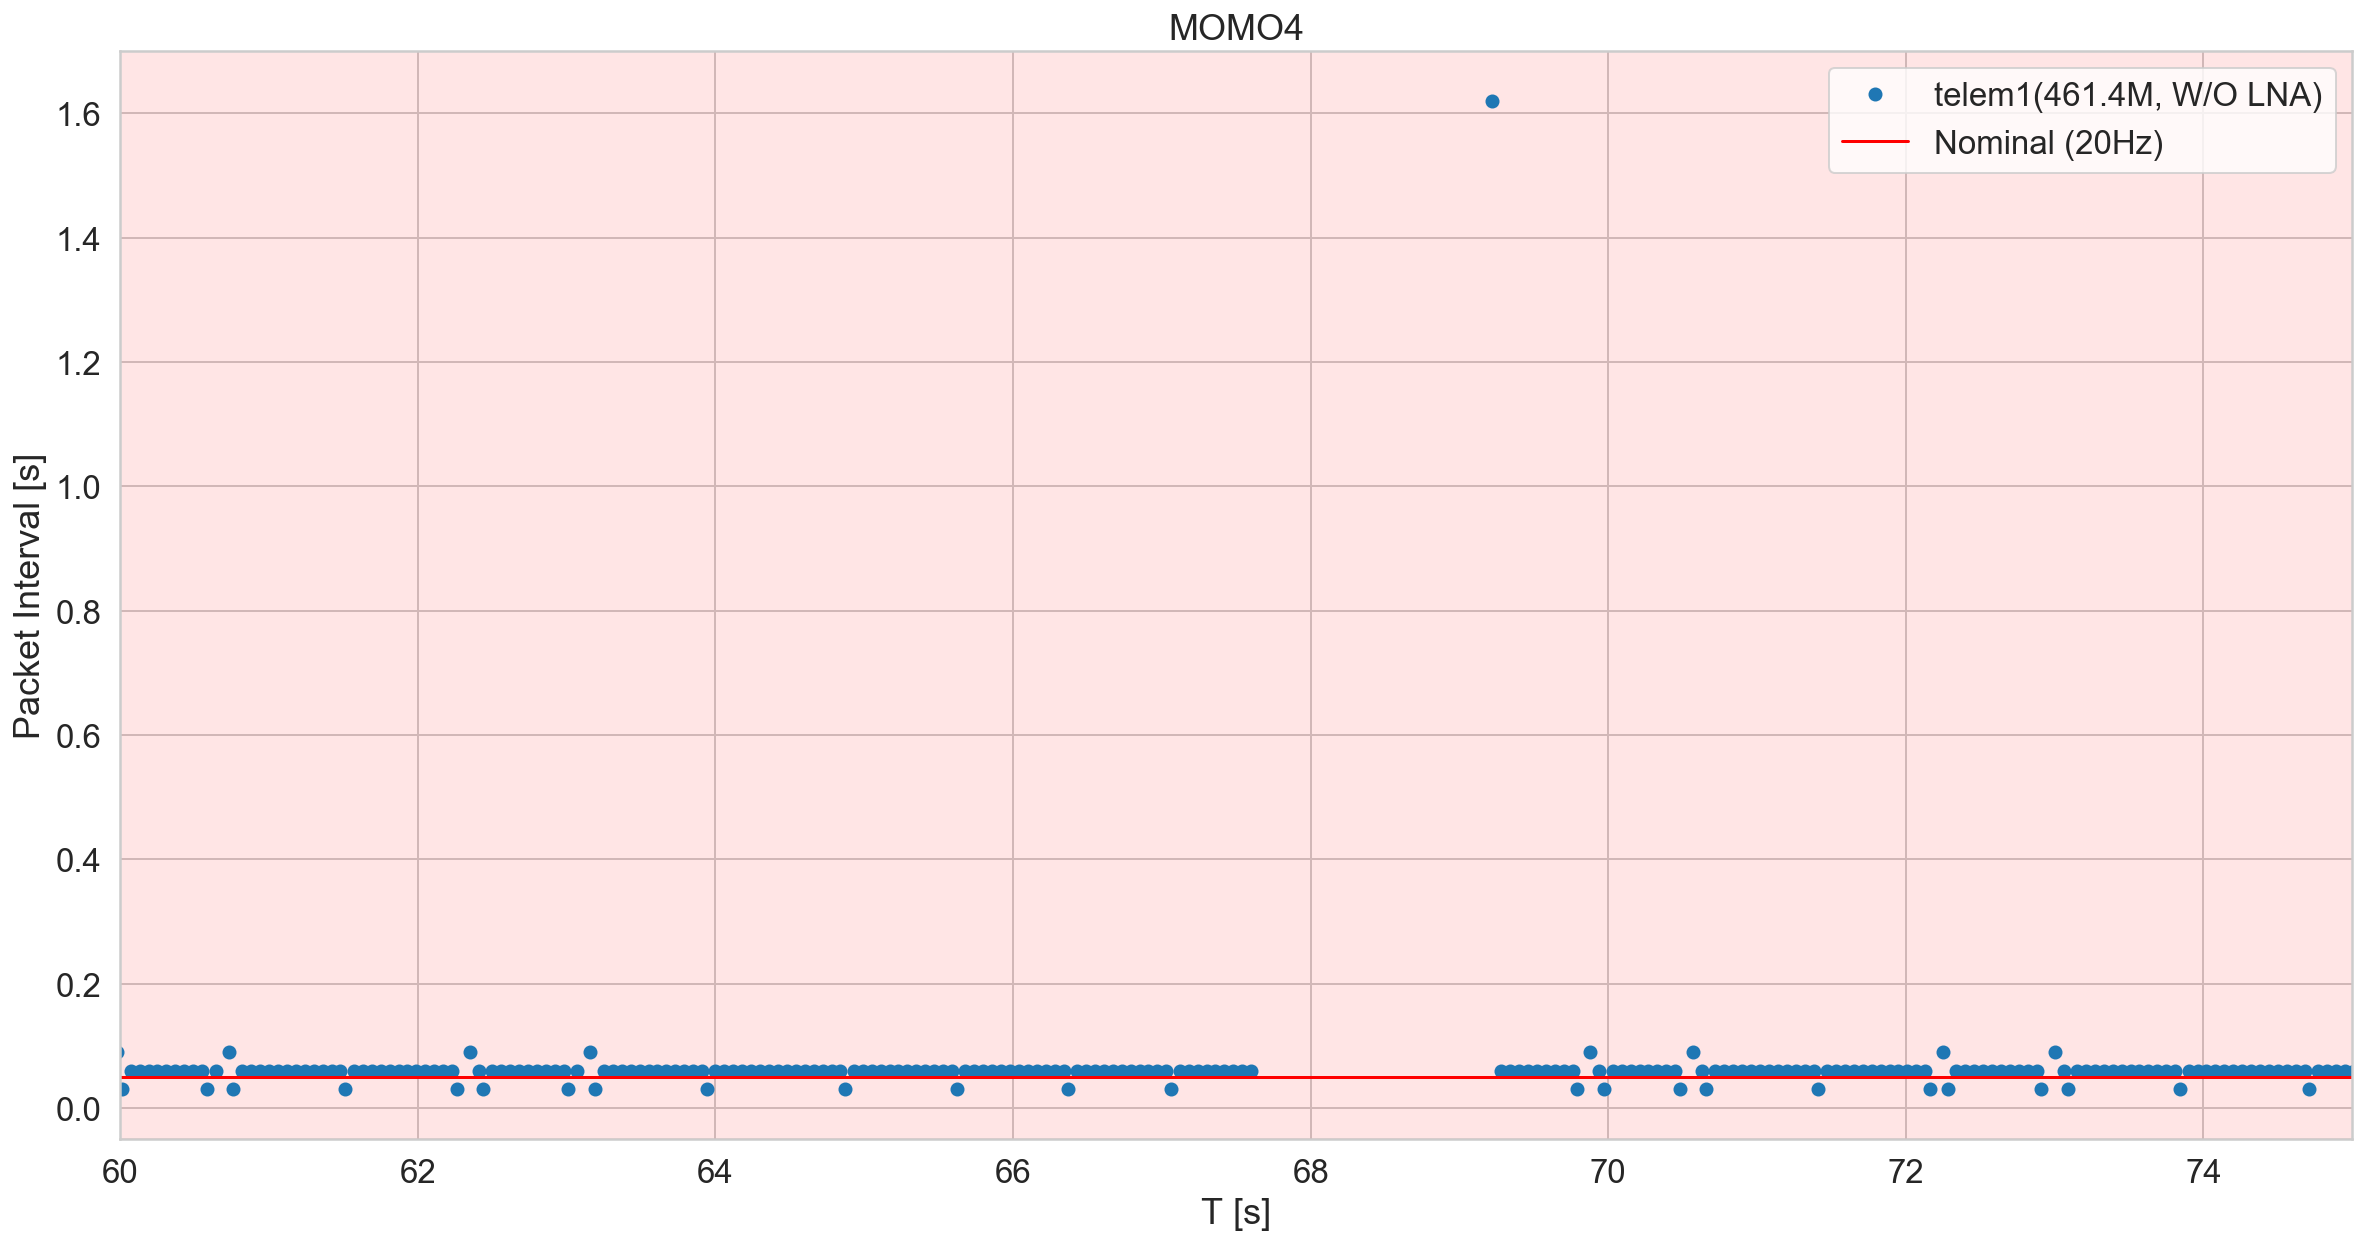

In [24]:
df = read_csv('telem1', 'receiver_rssi')
plt.plot(df.iloc[:,0][1:], np.diff(df.iloc[:,0]), 'o', label='telem1(461.4M, W/O LNA)')
#df = read_csv('telem2', 'receiver_rssi')
#plt.plot(df.iloc[:,0][1:], np.diff(df.iloc[:,0]), 'o', label='telem2(461.3M, W LNA)')
#df = read_csv('telem3', 'receiver_rssi')
#plt.plot(df.iloc[:,0][1:], np.diff(df.iloc[:,0]), 'o', label='telem3(461.4M, W LNA)')
plt.axhline(0.05, color='red', alpha=1.0, label='Nominal (20Hz)')
plt.legend()
plt.ylabel('Packet Interval [s]')
plt.xlabel('T [s]')
plt.axvspan(0,118,color='red',alpha=0.1)
plt.xlim(60, 75)
plt.title(title)
plt.savefig(prefix + '_' + title + '_telemetry_rf_packet_interval.png', dpi=300)

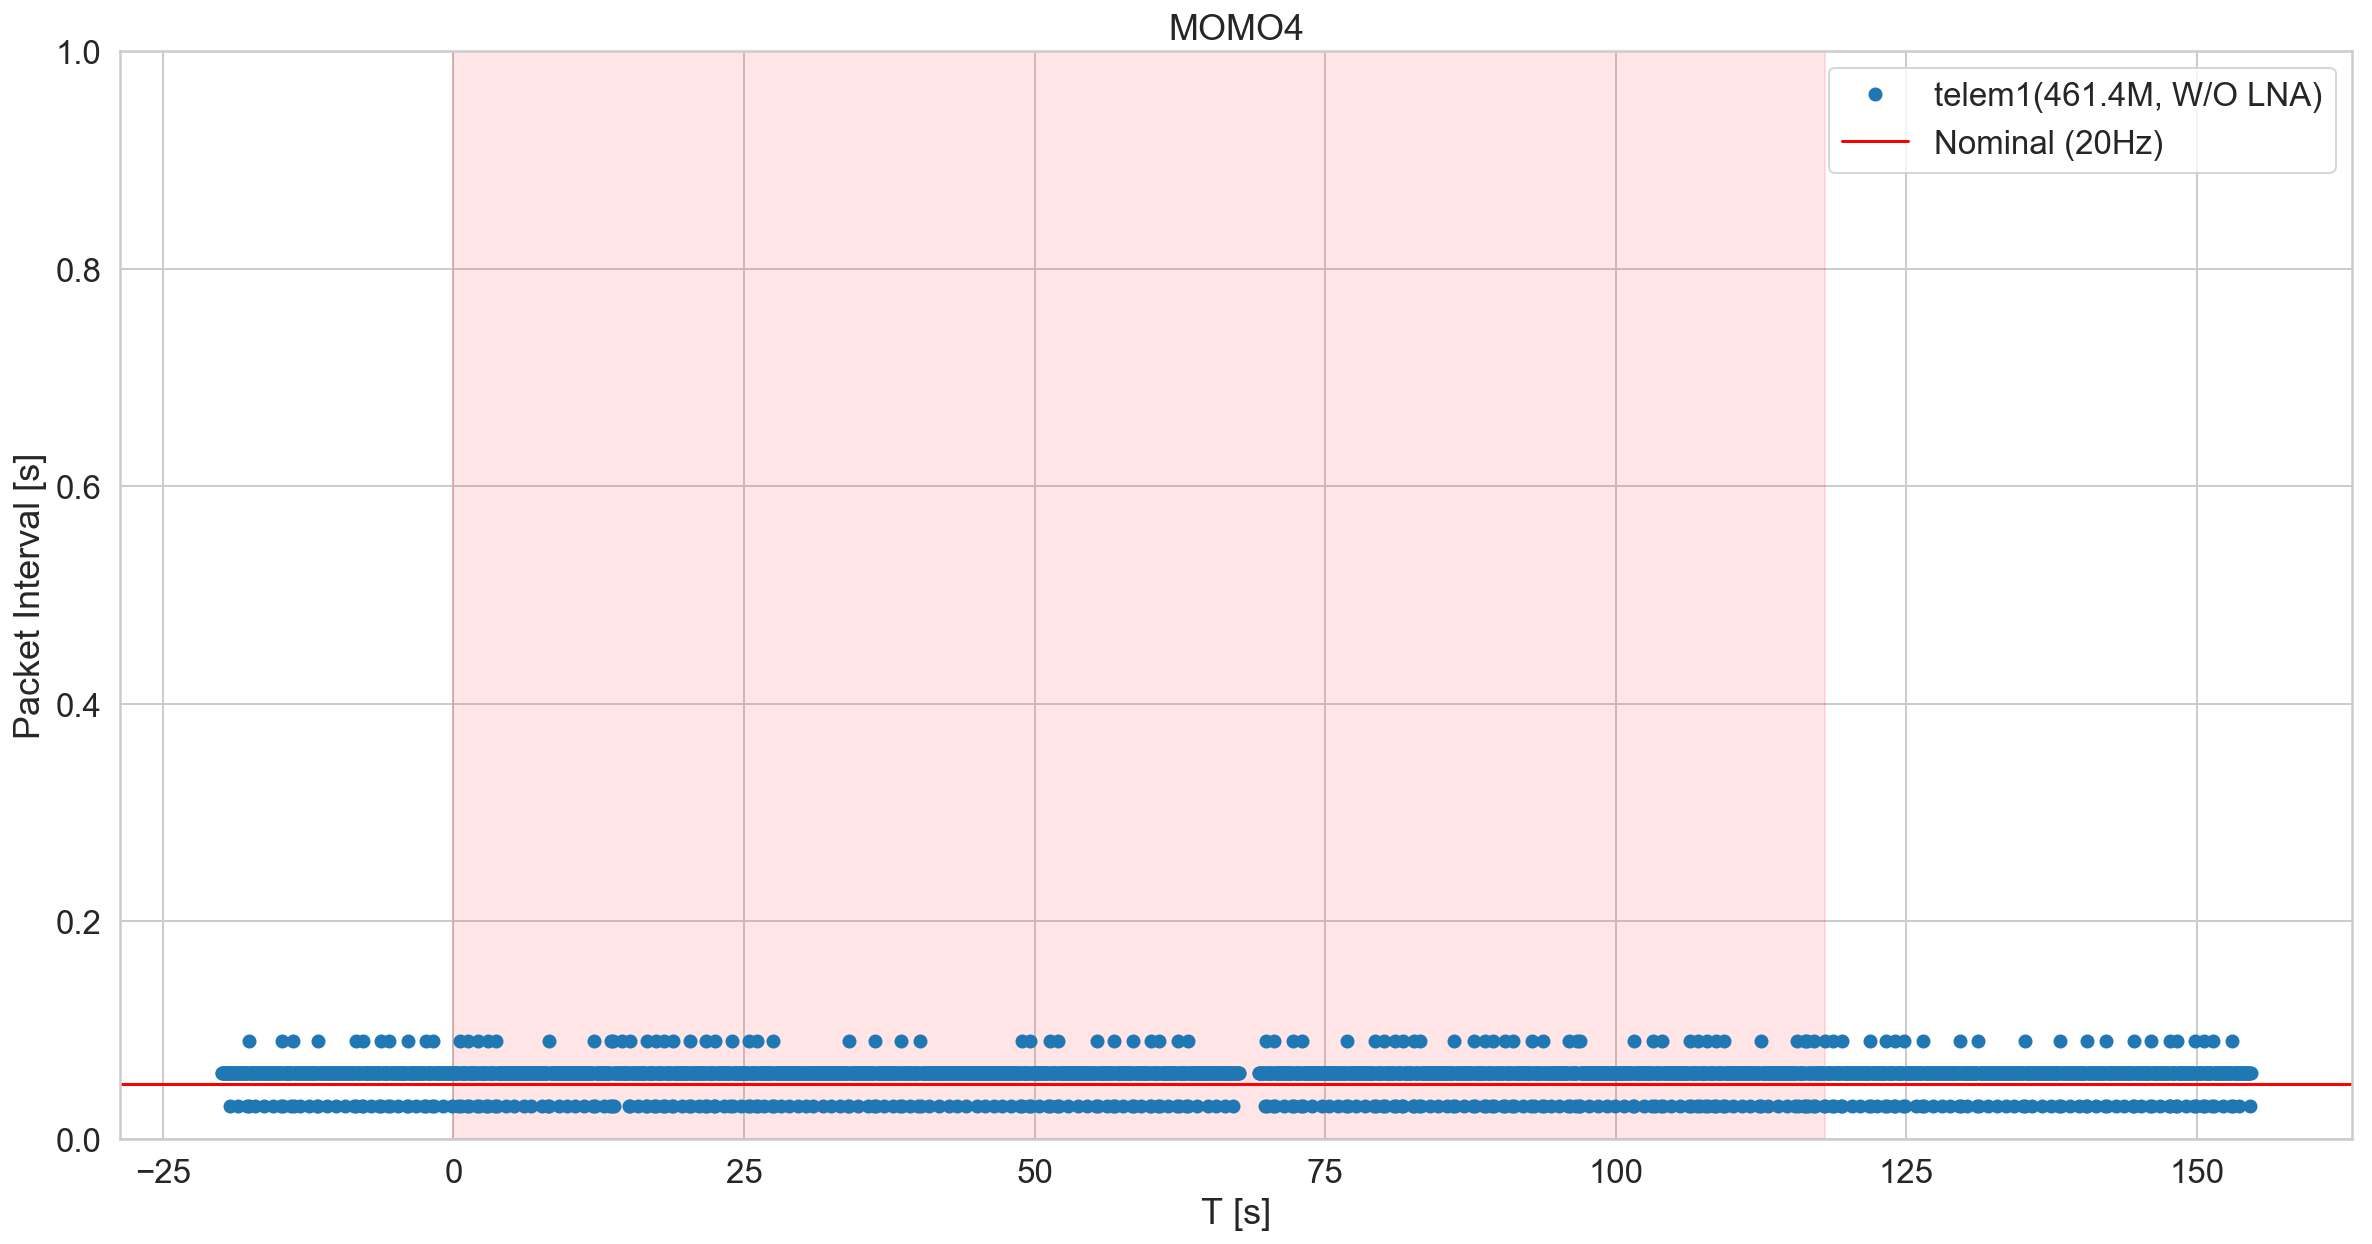

In [25]:
df = read_csv('telem1', 'receiver_rssi')
plt.plot(df.iloc[:,0][1:], np.diff(df.iloc[:,0]), 'o', label='telem1(461.4M, W/O LNA)')
#df = read_csv('telem2', 'receiver_rssi')
#plt.plot(df.iloc[:,0][1:], np.diff(df.iloc[:,0]), 'o', label='telem2(461.3M, W LNA)')
#df = read_csv('telem3', 'receiver_rssi')
#plt.plot(df.iloc[:,0][1:], np.diff(df.iloc[:,0]), 'o', label='telem3(461.4M, W LNA)')
plt.axhline(0.05, color='red', alpha=1.0, label='Nominal (20Hz)')
plt.legend()
plt.ylabel('Packet Interval [s]')
plt.xlabel('T [s]')
plt.ylim(0, 1)
plt.axvspan(0,118,color='red',alpha=0.1)
plt.title(title)
plt.savefig(prefix + '_' + title + '_telemetry_rf_packet_interval_zoom.png', dpi=300)

### Voltages

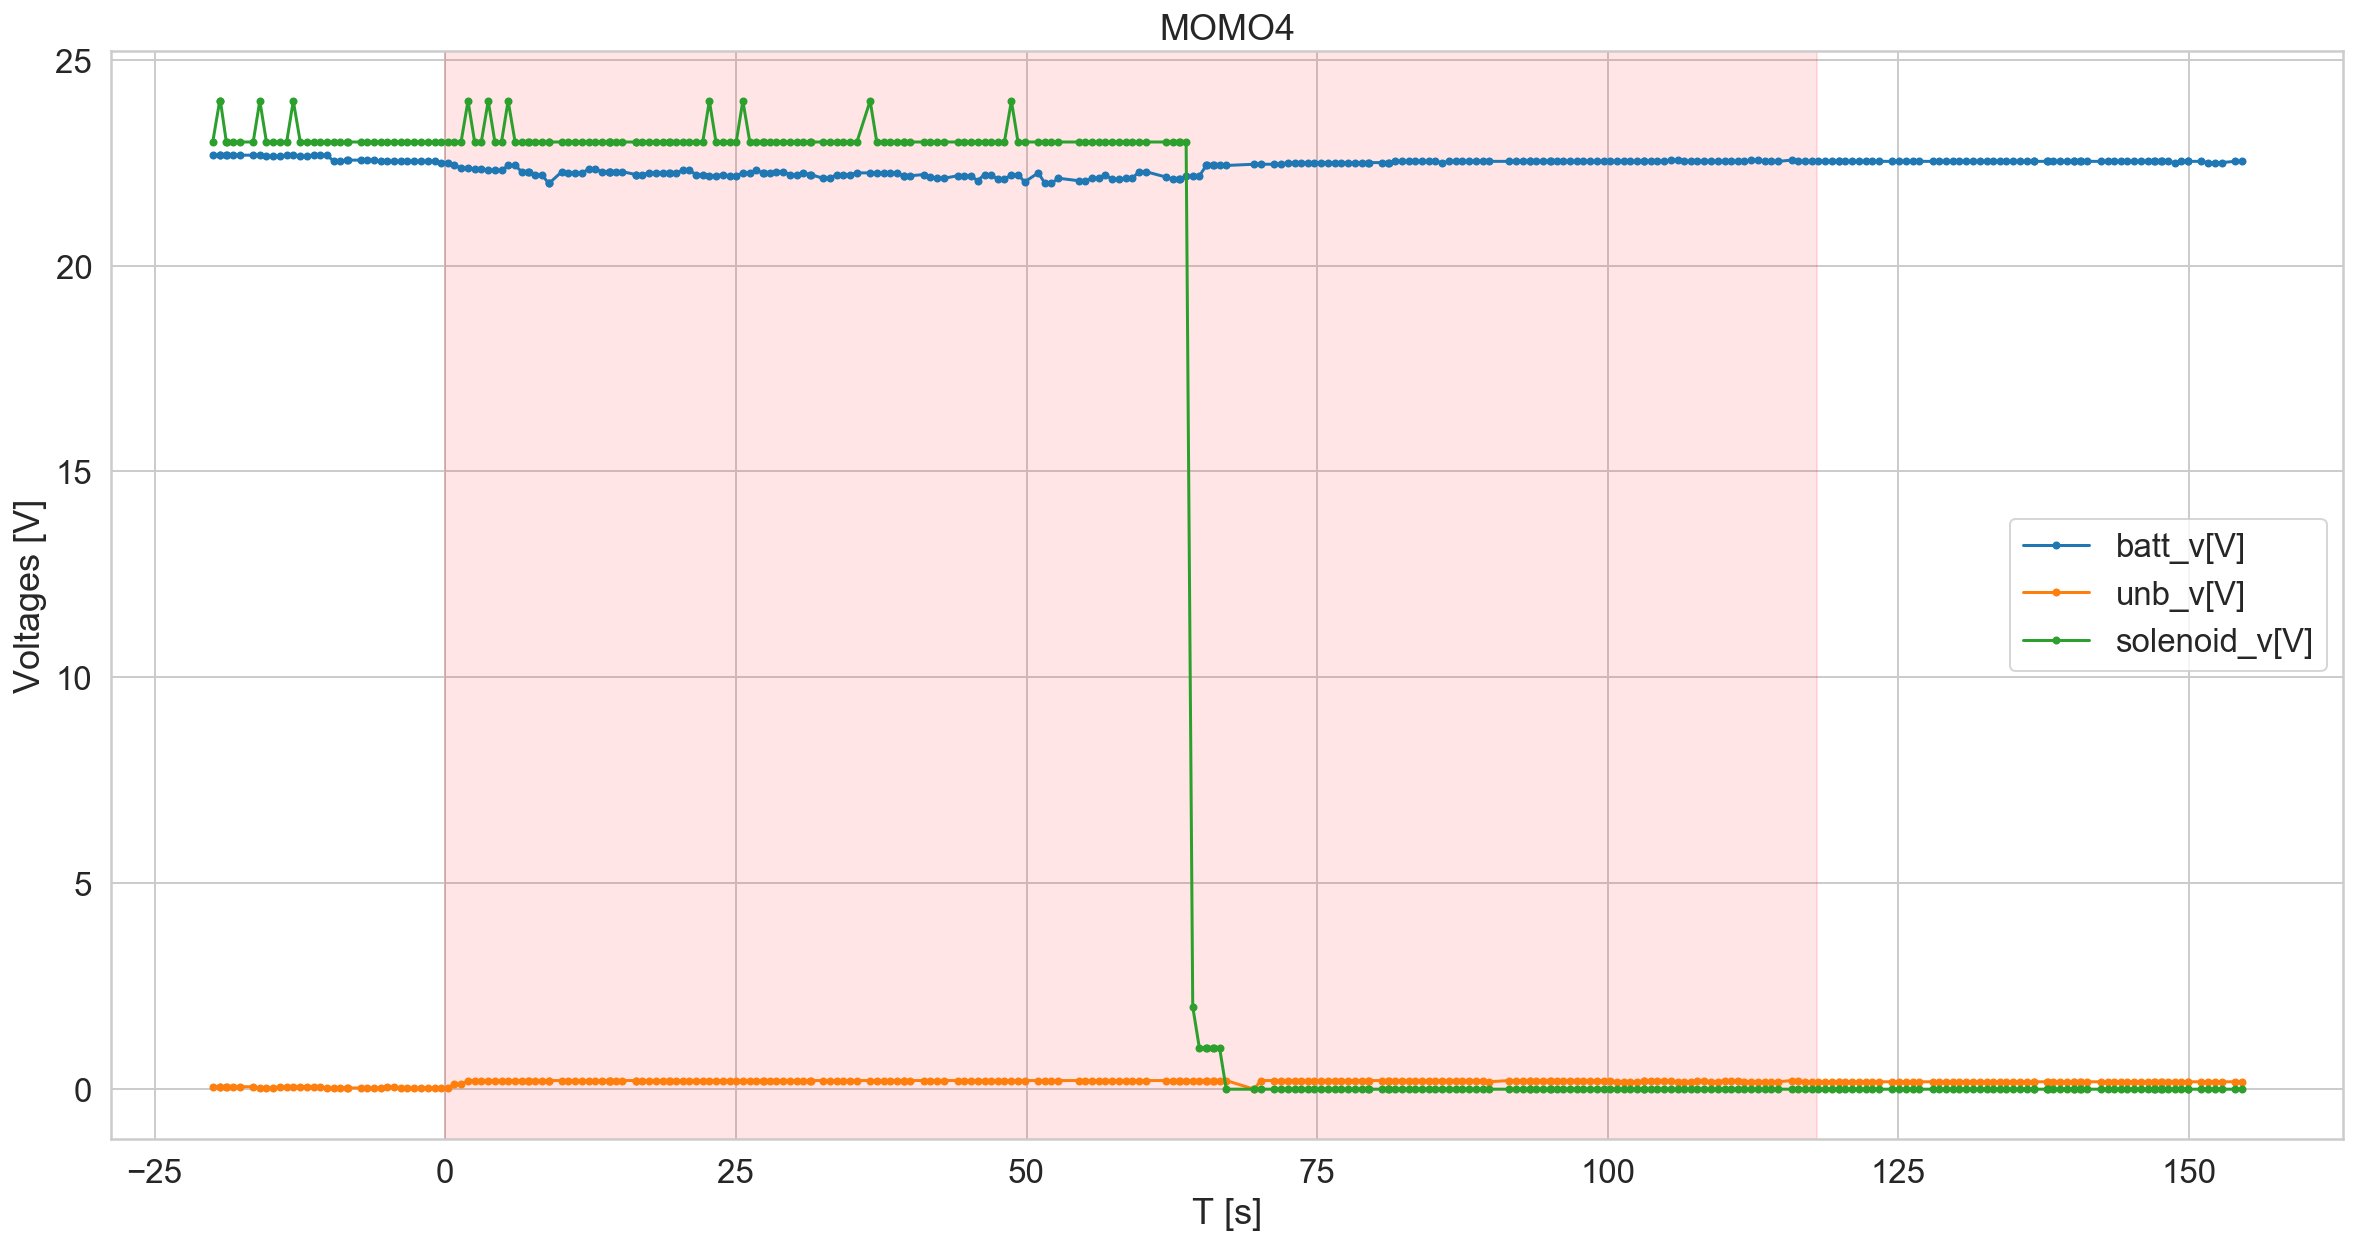

In [26]:
plot_csv(prefix, 'command_rf_and_voltages', ['batt_v[V]','unb_v[V]','solenoid_v[V]'])
plt.legend()
plt.ylabel('Voltages [V]')
plt.xlabel('T [s]')
plt.title(title)
plt.axvspan(0,118,color='red',alpha=0.1)
plt.savefig(prefix + '_' + title + '_voltages.png', dpi=300)

### GPS

In [27]:
df_ecef = read_csv(prefix, 'ecef_ecefvel')

In [28]:
import pymap3d as pm

In [29]:
(b,l,h) = pm.ecef2geodetic(df_ecef['ecef_x[m]'], df_ecef['ecef_y[m]'], df_ecef['ecef_z[m]'])

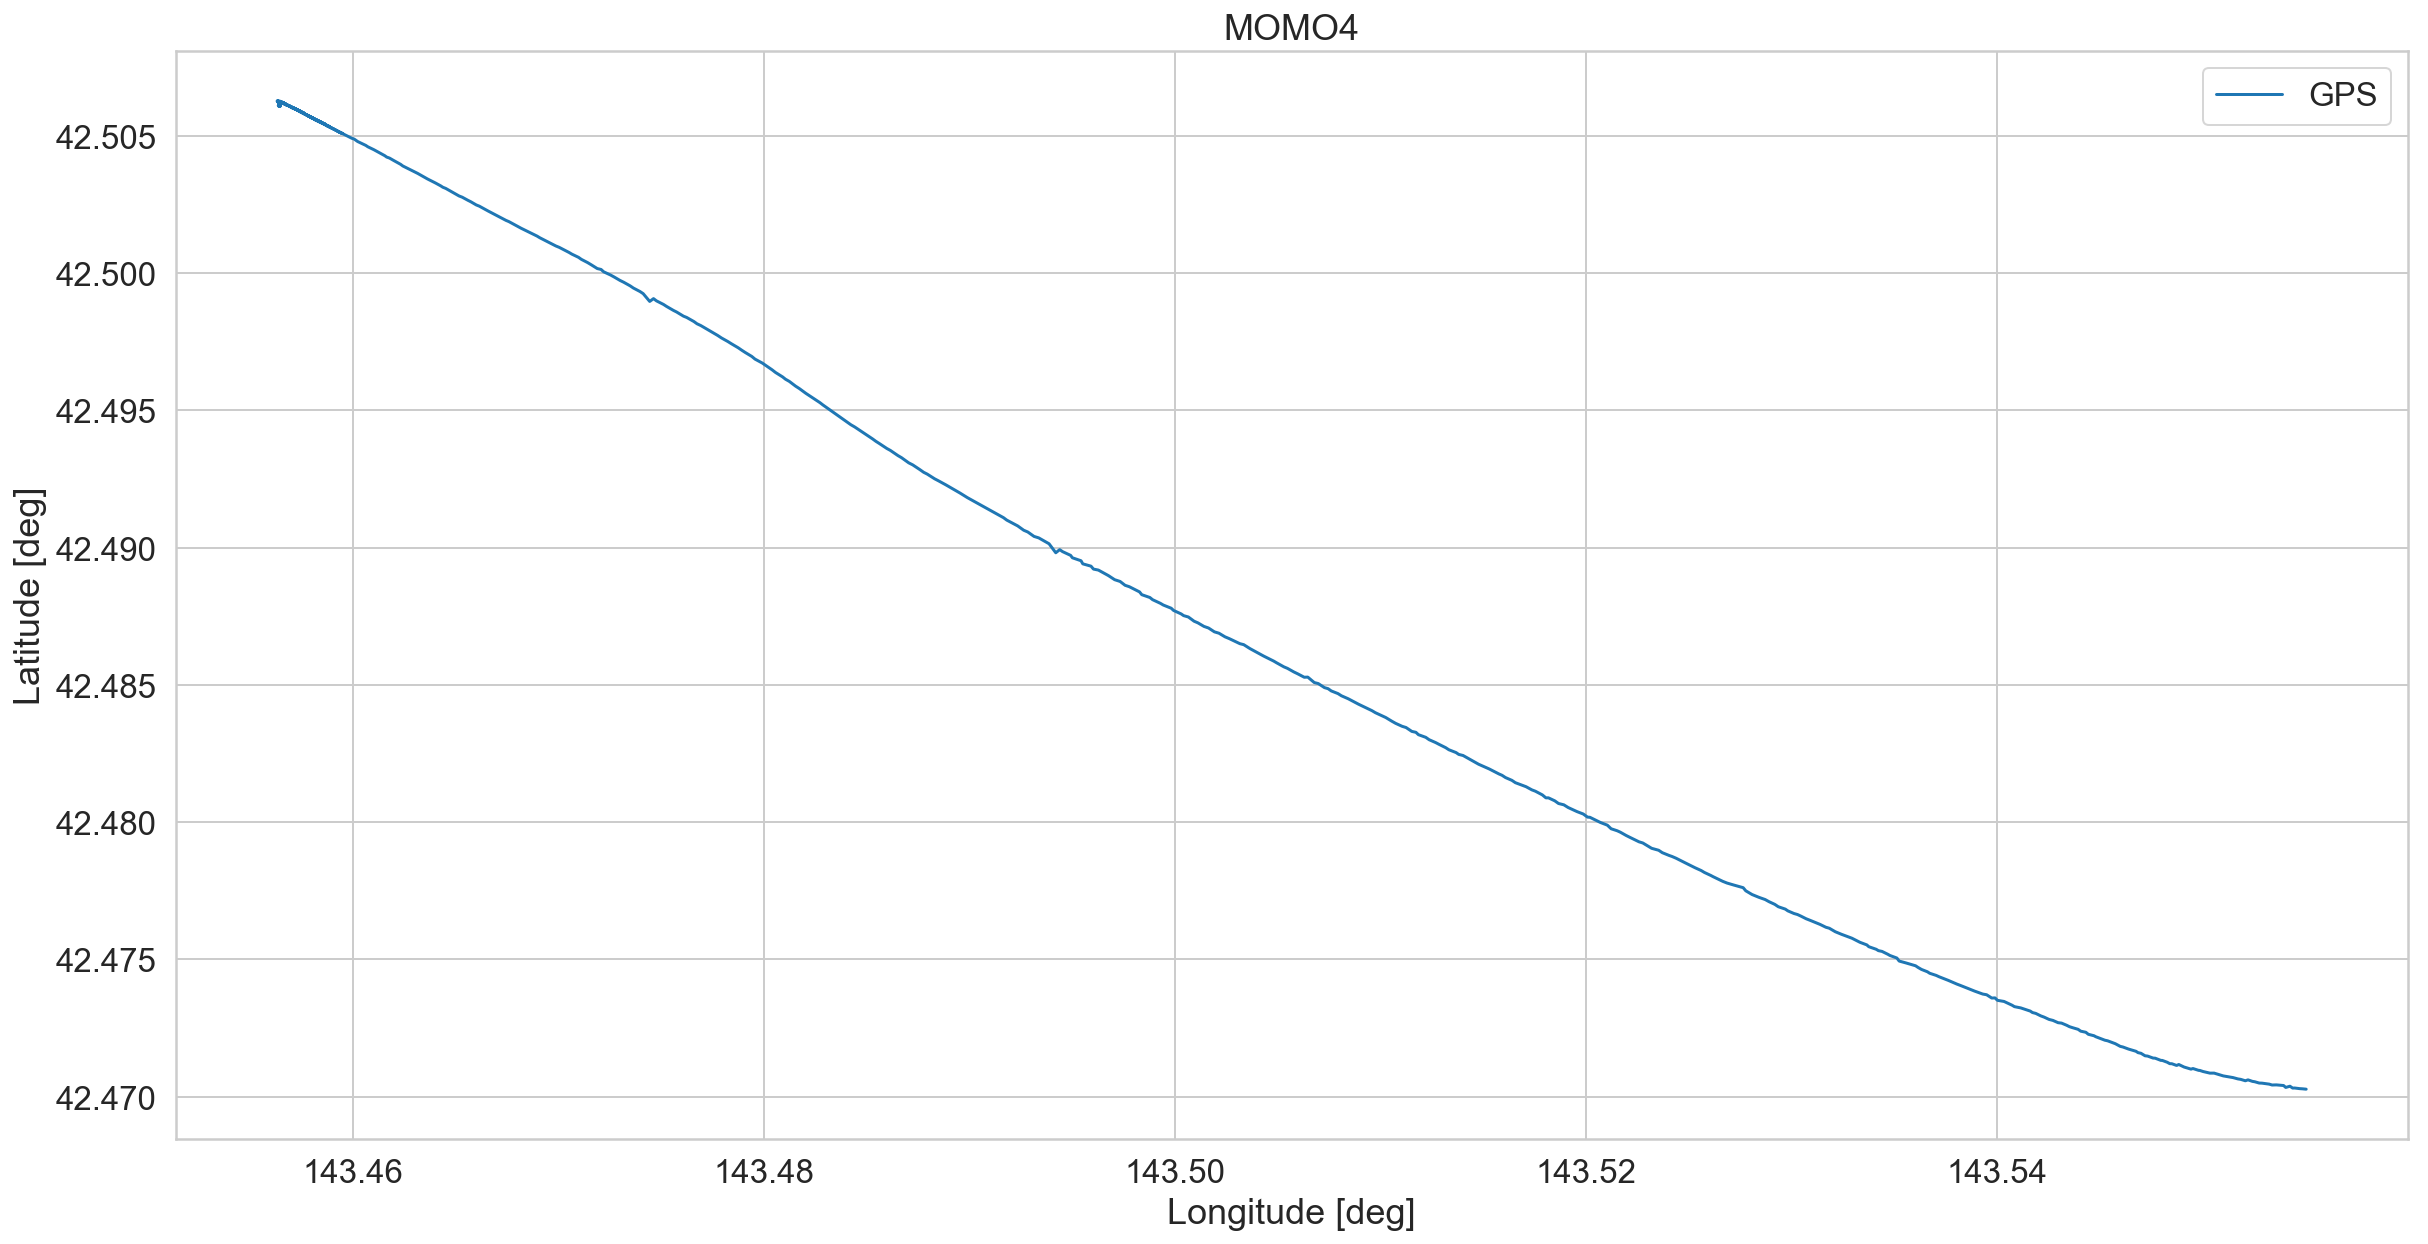

In [30]:
plt.plot(l, b, label='GPS')
plt.ylabel('Latitude [deg]')
plt.xlabel('Longitude [deg]')
plt.legend()
plt.title(title)
plt.savefig(title + '_gps_2d_position.png', dpi=300)

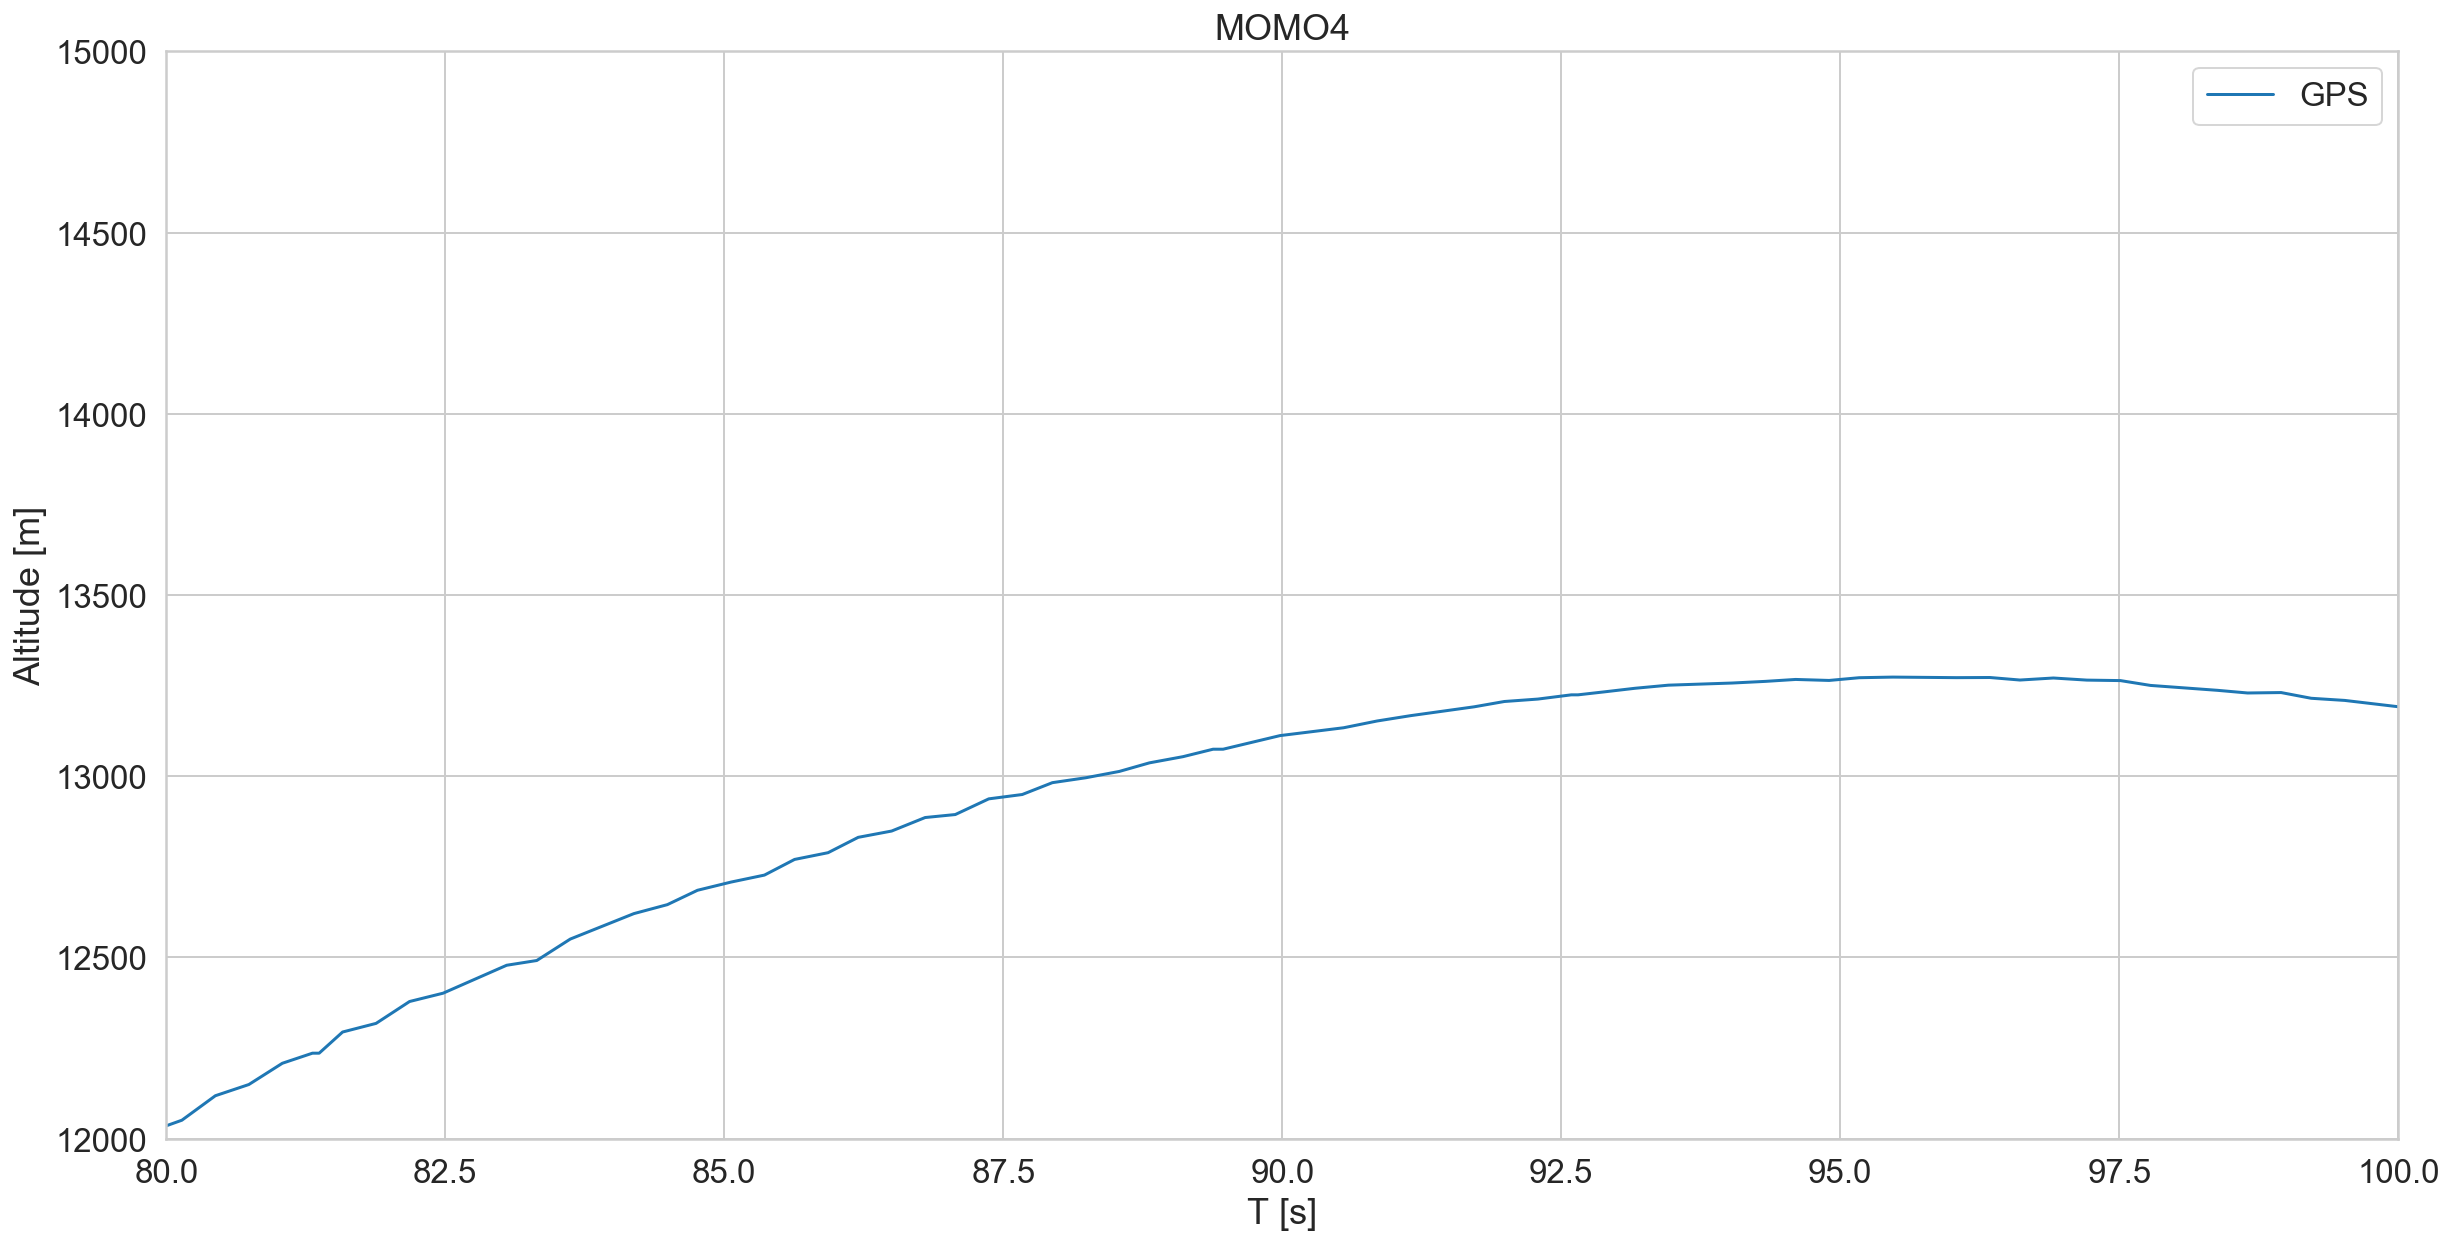

In [31]:
plt.plot(df_ecef['T[s]'], h, label='GPS')
plt.legend()
plt.ylabel('Altitude [m]')
plt.xlabel('T [s]')
plt.title(title)
plt.xlim(80,100)
plt.ylim(12000,15000)
plt.savefig(title + '_gps_altitude.png', dpi=300)

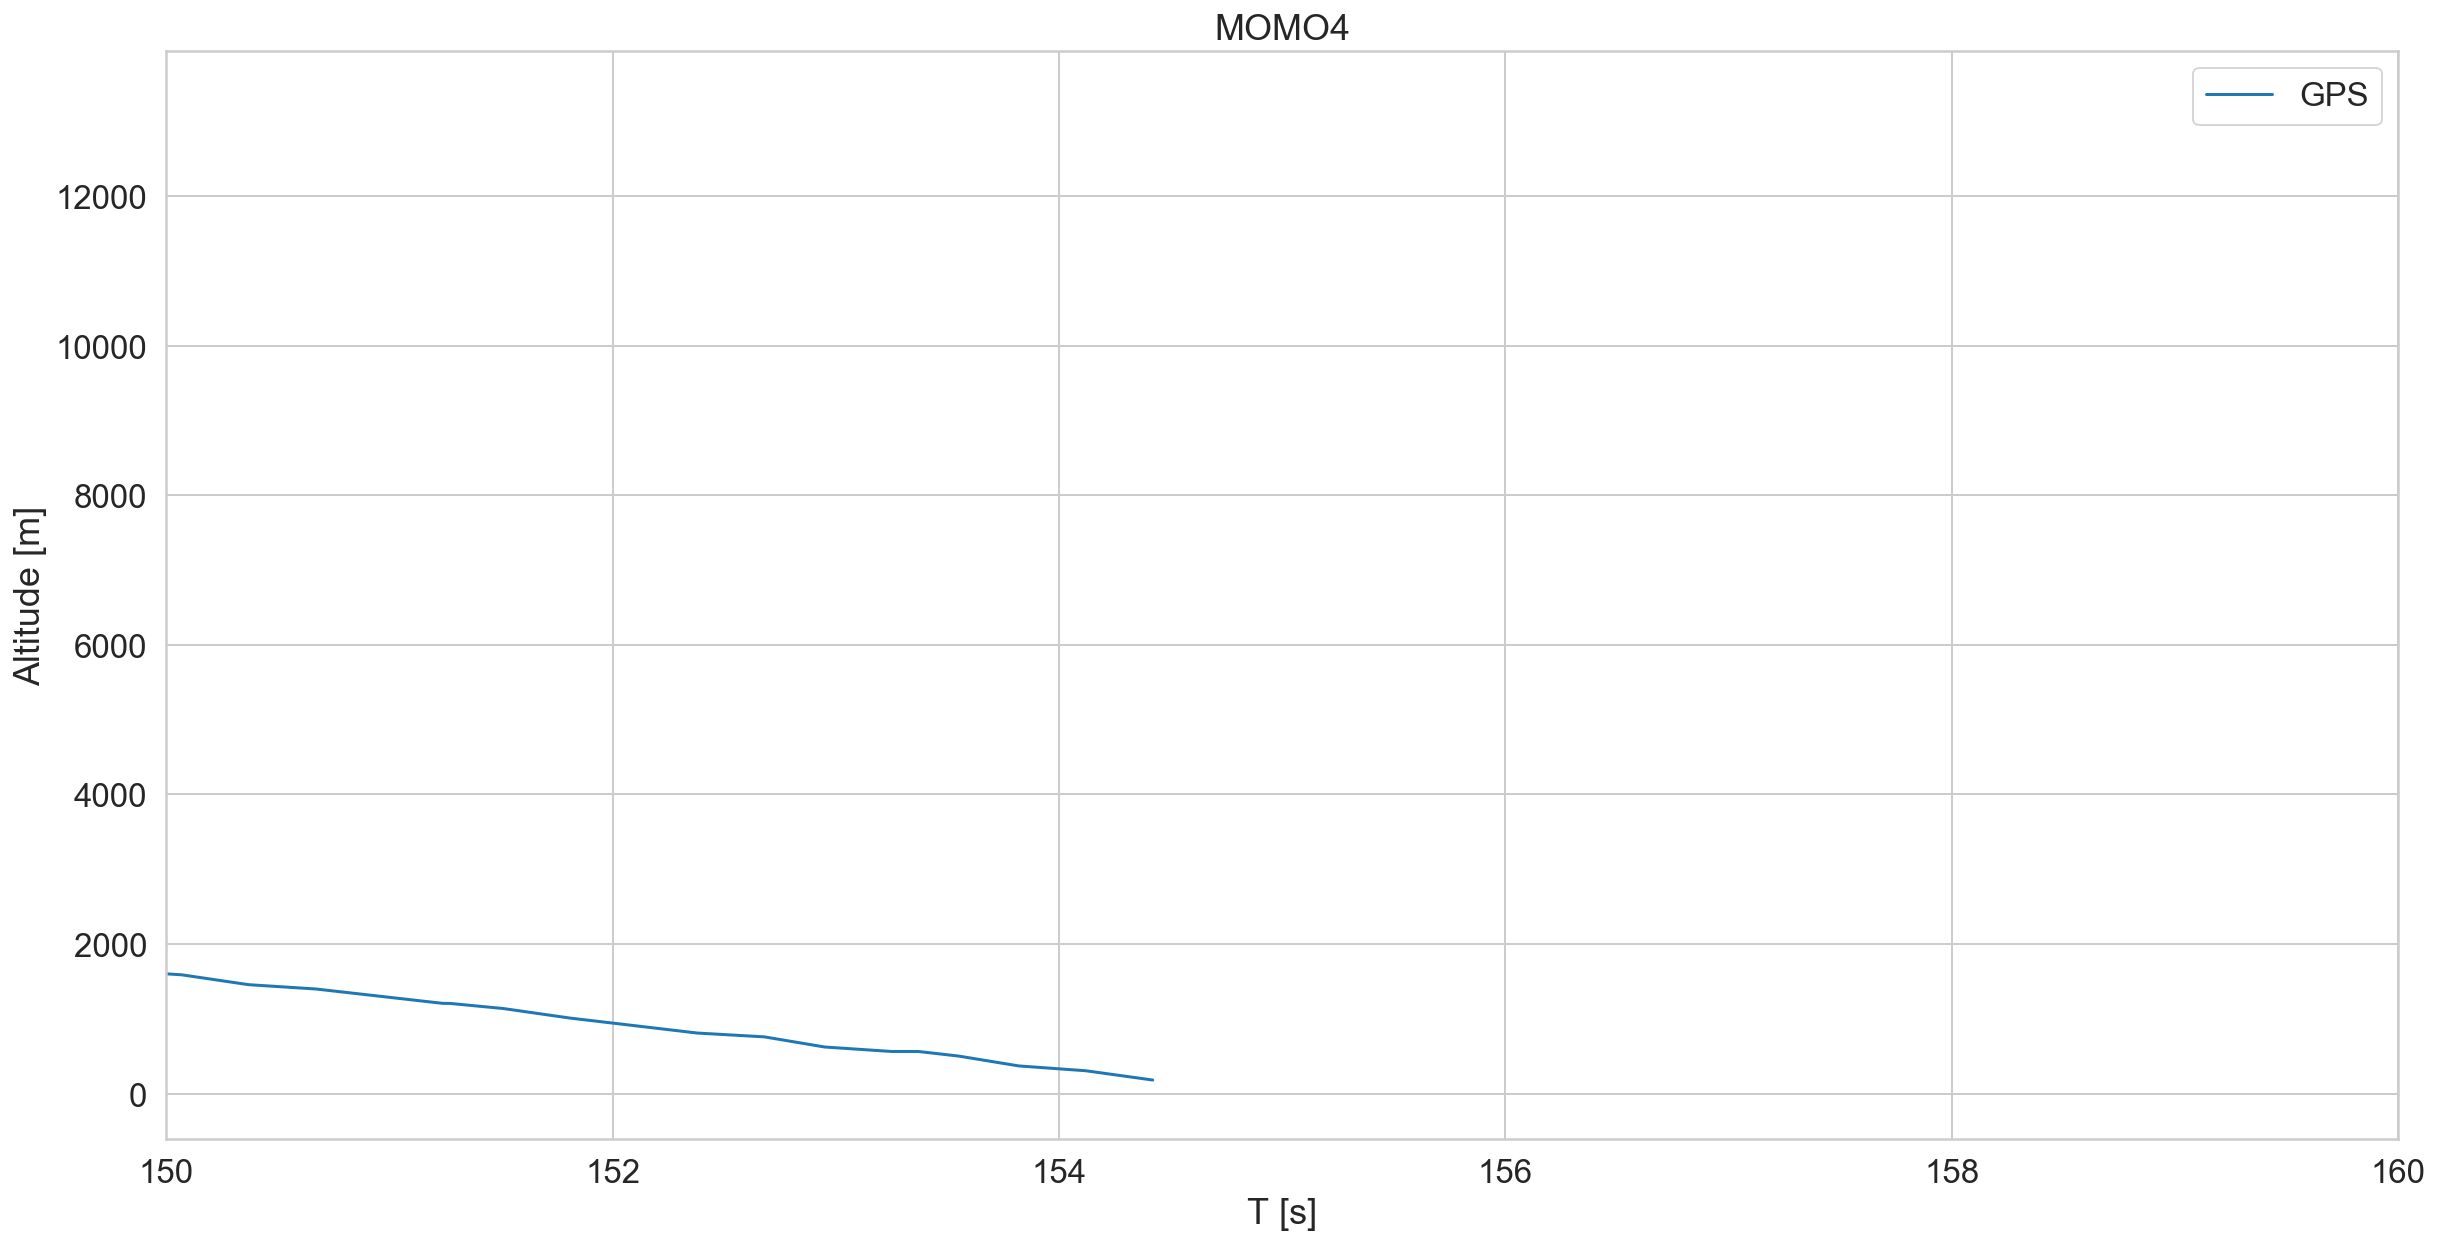

In [32]:
plt.plot(df_ecef['T[s]'], h, label='GPS')
plt.legend()
plt.ylabel('Altitude [m]')
plt.xlabel('T [s]')
plt.title(title)
plt.xlim(150,160)
#plt.ylim(12000,15000)
plt.savefig(title + '_gps_altitude.png', dpi=300)

In [33]:
np.max(h)

13273.456331345178

In [34]:
def get_enu(df):
    (b, l, h) = pm.ecef2geodetic(df['ecef_x[m]'][0], df['ecef_y[m]'][0], df['ecef_z[m]'][0])
    (e, n, u) = pm.ecef2enu(df['ecef_x[m]'], df['ecef_y[m]'], df['ecef_z[m]'], b, l, h)
    return (e, n, u)

In [35]:
enu = get_enu(df_ecef)

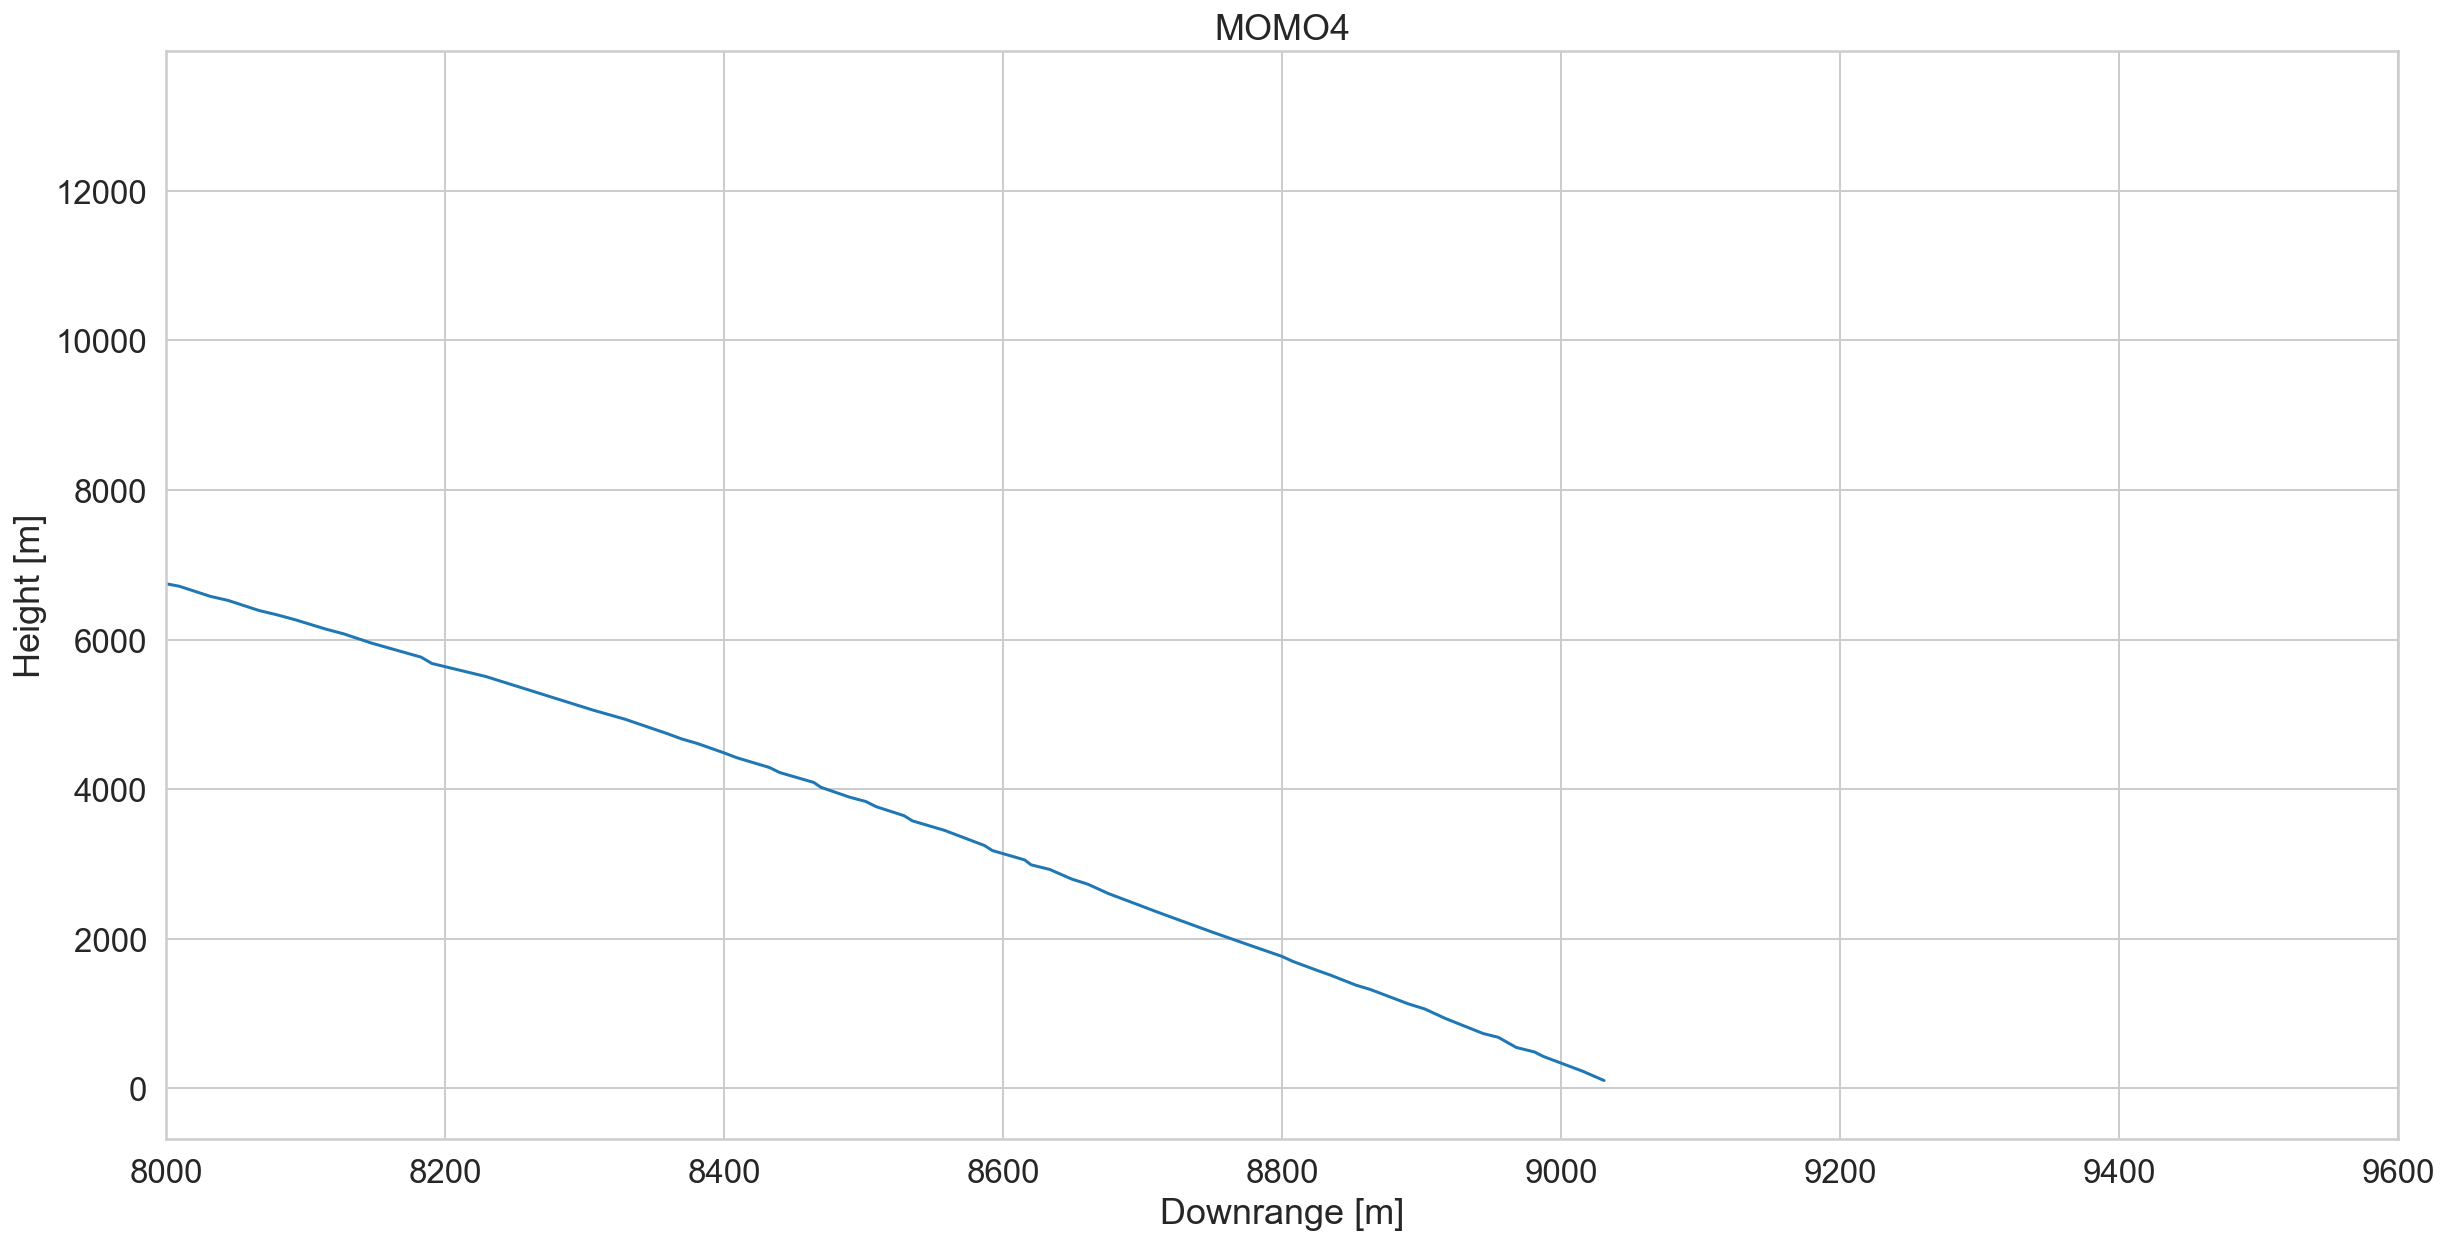

In [36]:
plt.plot(np.sqrt(enu[0]*enu[0] + enu[1]*enu[1]), enu[2])
plt.ylabel('Height [m]')
plt.xlabel('Downrange [m]')
plt.xlim(8000,9600)
plt.title(title)
plt.savefig(title + '_gps_downrange.png', dpi=300)

### Module Health

In [37]:
df = read_csv('telem1', 'modules_health')
for c in list(df.columns):
    if c != 'T[s]' and c != 'adis_error_flag':
        false_array = list(df[c].where(df[c] == False).dropna())
        if len(false_array) != 0:
            print(c)
    elif c != 'adis_error_flag':
        true_array = list(df[c].where(df[c] == True).dropna())
        if len(true_array) != 0:
            print(c)

alive_5f_rf_150


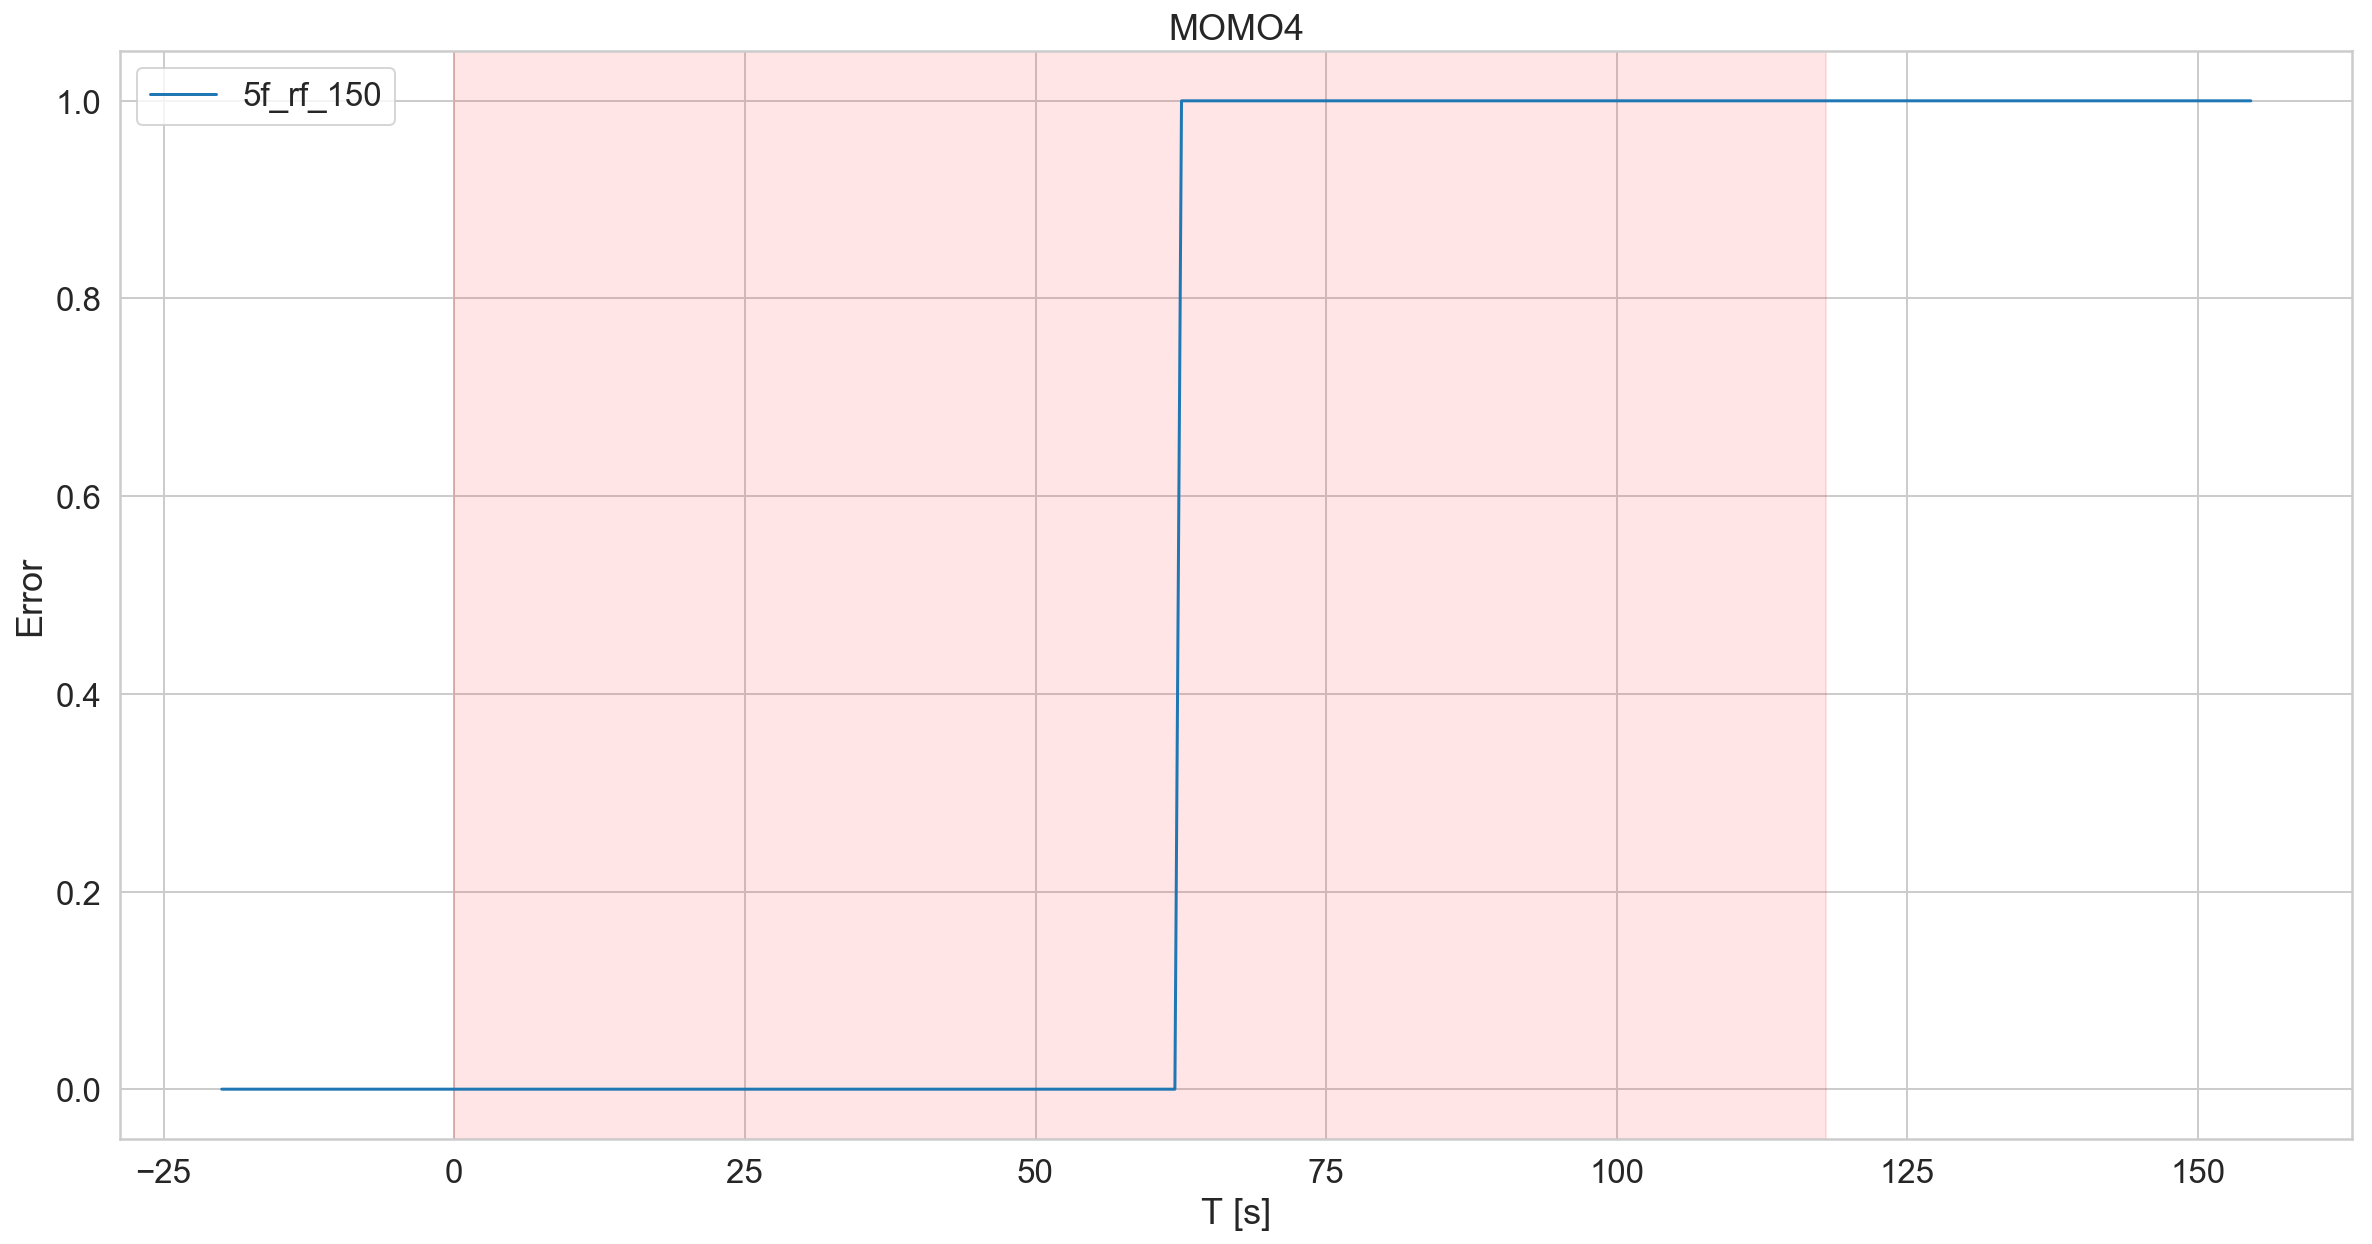

In [38]:
df = read_csv('telem1', 'modules_health')
plt.plot(df.iloc[:,0], 1.0-df['alive_5f_rf_150']*1.0, label='5f_rf_150')
plt.legend()
plt.ylabel('Error')
plt.xlabel('T [s]')
plt.title(title)
plt.axvspan(0,118,color='red',alpha=0.1)
plt.savefig(prefix + '_' + title + '_module_health.png', dpi=300)

### Strain Gaues

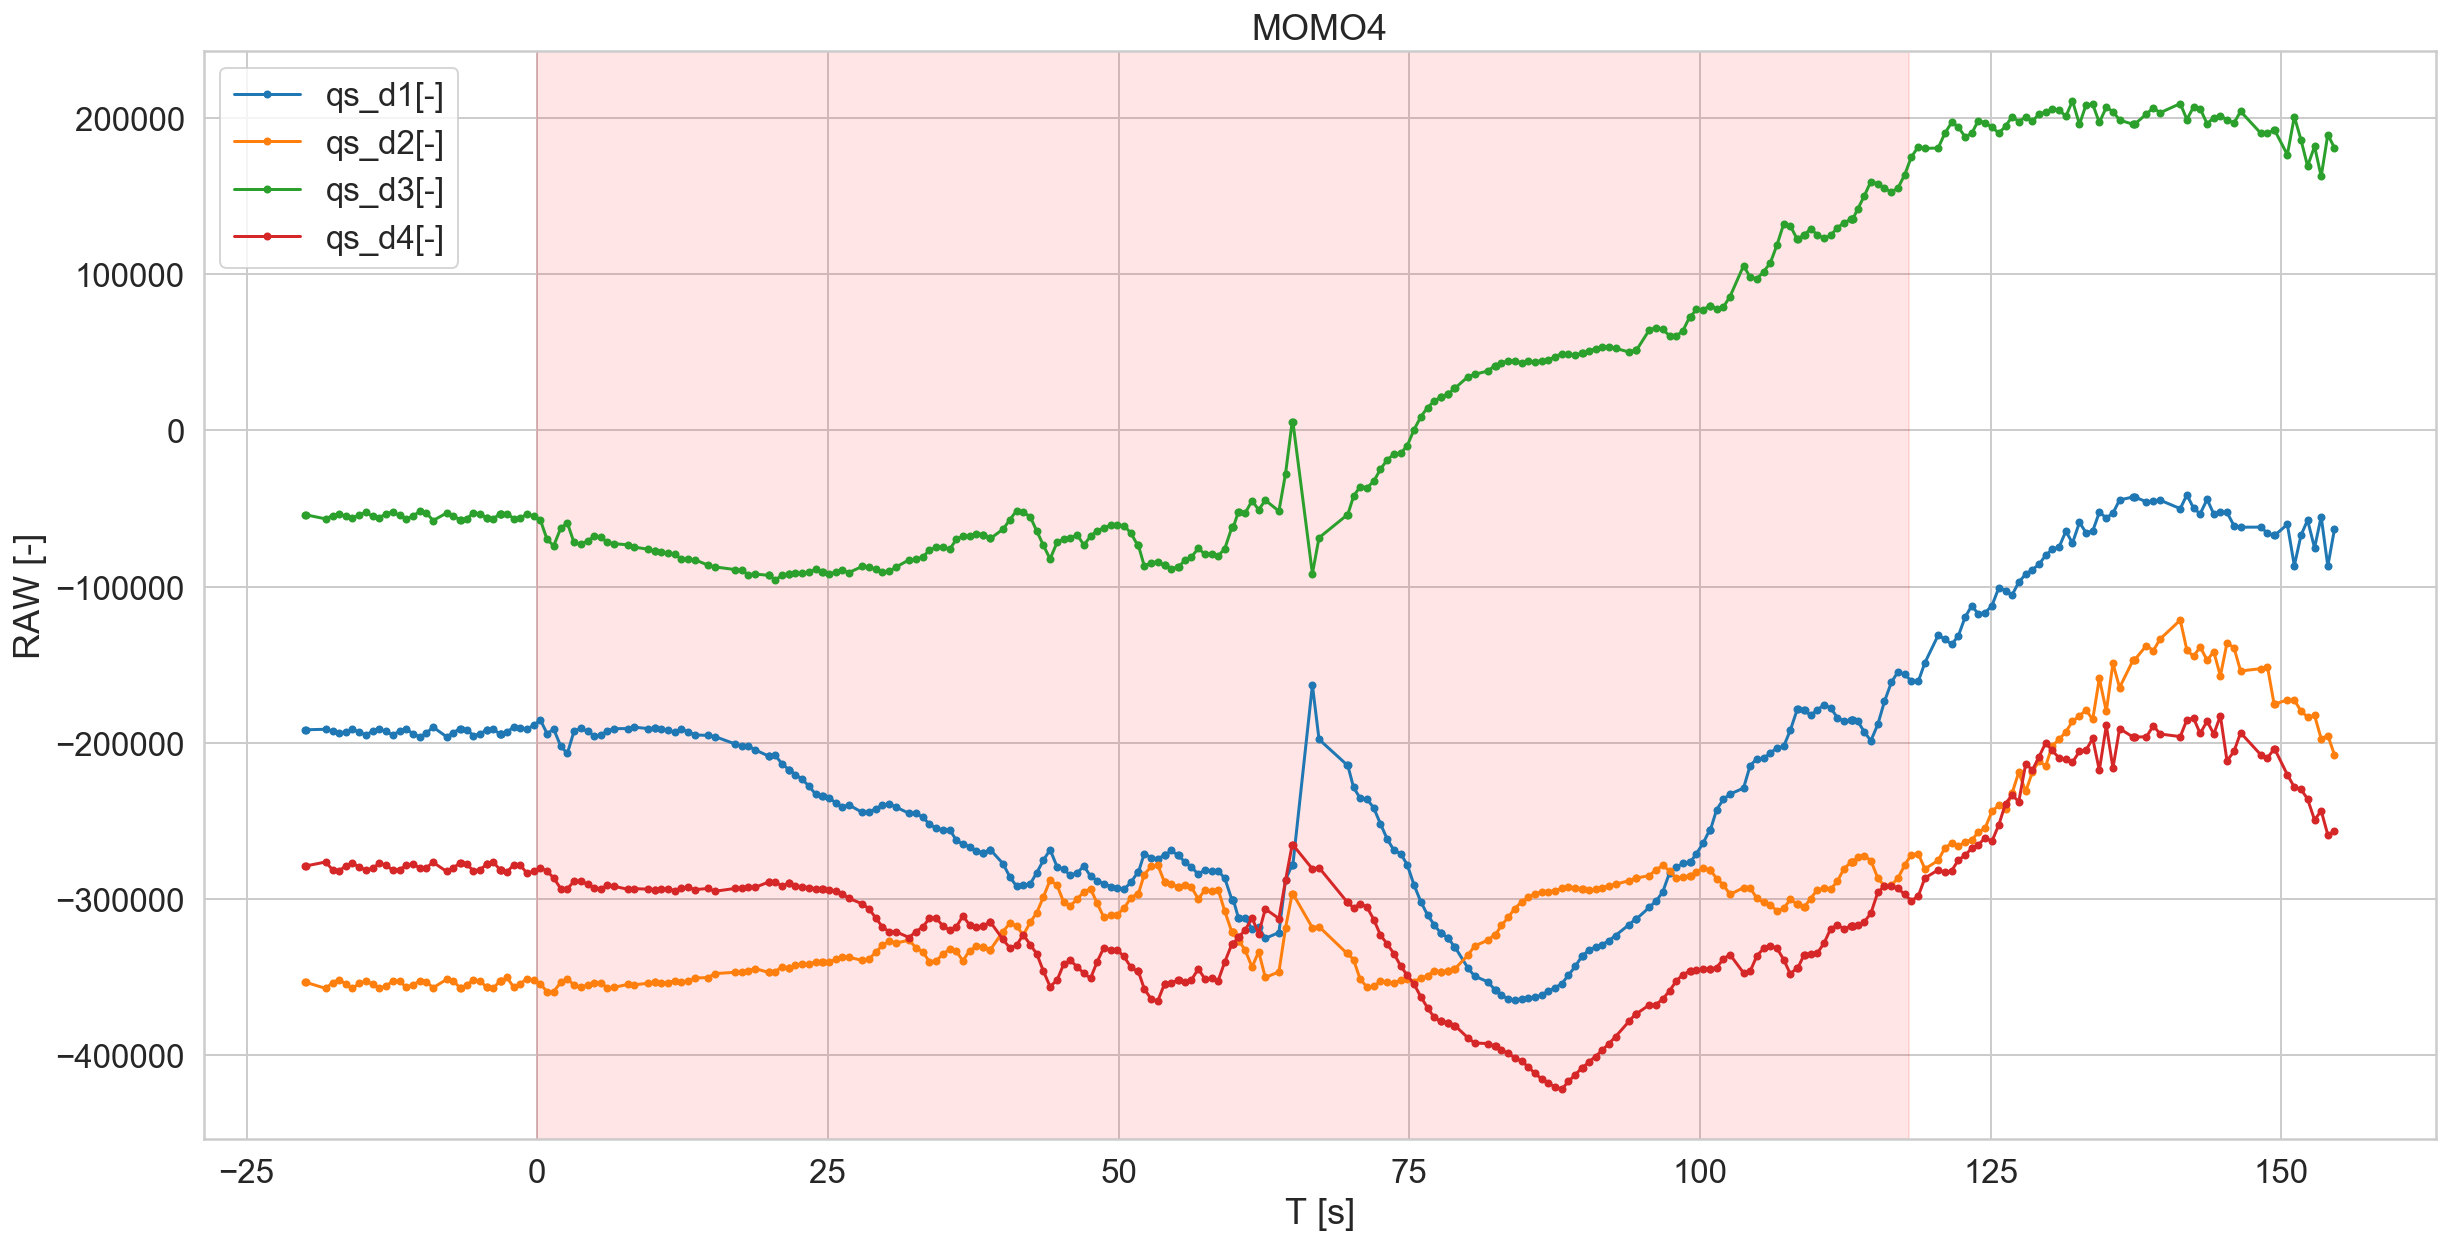

In [40]:
plot_csv(prefix, 'strain_gauges', ['qs_d1[-]','qs_d2[-]','qs_d3[-]','qs_d4[-]'])
plt.legend()
plt.ylabel('RAW [-]')
plt.xlabel('T [s]')
plt.title(title)
plt.axvspan(0,118,color='red',alpha=0.1)
plt.savefig(prefix + '_' + title + '_strain_gauges.png', dpi=300)